In [277]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [278]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [279]:
#Start with spring and work our way down to winter
season = 1
season_year = 2002
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2002-03-01 to 2002-05-31
Columns: 281 entries, 10000009 to 22000047
dtypes: float64(281)
memory usage: 202.7 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-03-01  3.952552  2.104383  2.628793  2.411339  1.661892  3.339721   
2002-03-02  2.050030  1.609403  1.754880  1.894788  1.262341  3.325642   
2002-03-03  1.815048  1.460839  1.428414  1.756101  1.225882  3.294194   
2002-03-04  1.942694  1.410455  1.390839  1.761051  1.287151  3.199349   
2002-03-05  1.719548  1.306794  1.239340  1.601370  1.137048  3.100920   
...              ...       ...       ...       ...       ...       ...   
2002-05-27  0.857112  0.734239  0.361238  0.886044  0.603879  0.662444   
2002-05-28  0.851443  0.689612  0.337831  0.879259  0.590065  0.654662   
2002-05-29  0.866550  0.664338  0.341835  0.874625  0.586238  0.637981   
2002-05-30  1.027168  0.668637  0.341527  0.911865  0.597803  0.621284   
2002-05-31  0.998831  0.711762  0.326282  0.951885  0.640232  0.619081   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-03-01  3.754958  2.171611  

          2002-03-01  2002-03-02  2002-03-03  2002-03-04  2002-03-05  \
10000009   -0.047716   -0.120520   -0.116016   -0.103958   -0.103521   
10000010   -0.147925   -0.144684   -0.135639   -0.133634   -0.127030   
10000011   -0.119491   -0.136706   -0.137436   -0.134728   -0.130872   
10000014   -0.131282   -0.129034   -0.119282   -0.114086   -0.110252   
10000016   -0.171917   -0.163717   -0.148656   -0.140509   -0.136698   
...              ...         ...         ...         ...         ...   
7000003    -0.041187   -0.048873   -0.054432   -0.063487   -0.071901   
8000001    -0.051487   -0.050466   -0.066698   -0.073642   -0.077497   
9000001     0.024117   -0.011750   -0.017347   -0.015890   -0.008716   
9000015     0.004068   -0.026178   -0.029845   -0.028115   -0.020530   
22000047   -0.203946   -0.175962   -0.160341   -0.156044   -0.145298   

          2002-03-06  2002-03-07  2002-03-08  2002-03-09  2002-03-10  ...  \
10000009   -0.093845   -0.033743   -0.076519   -0.106798  

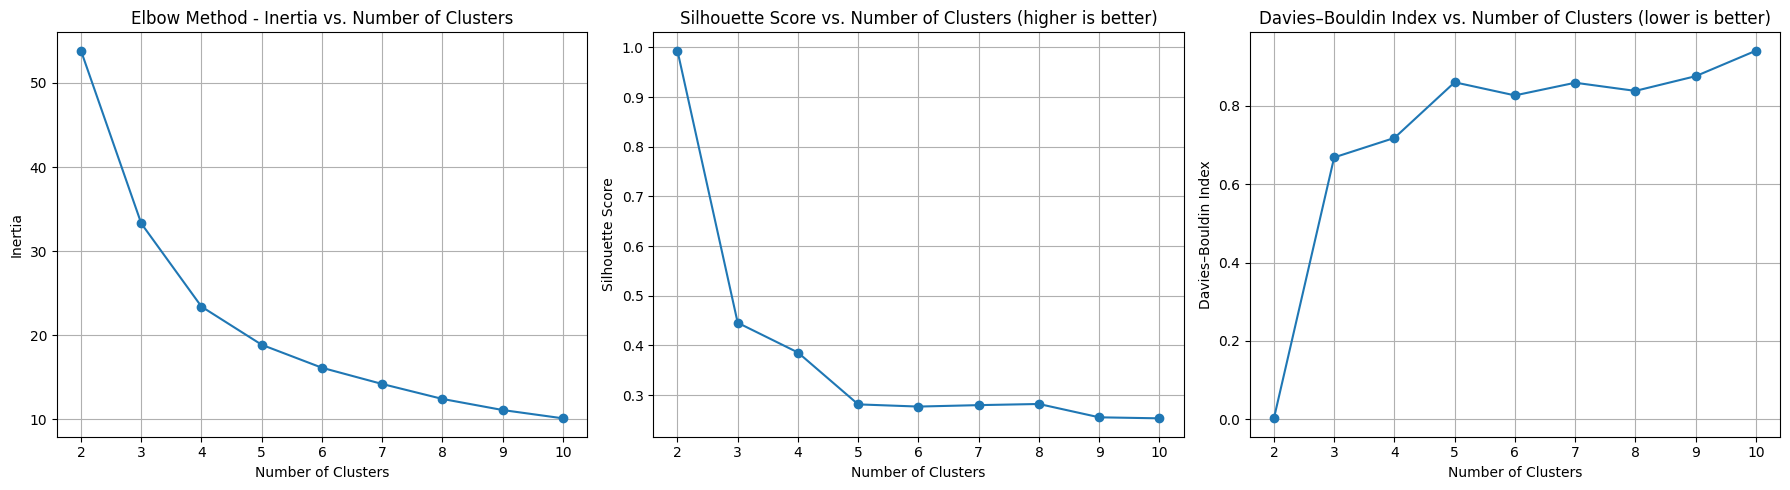

In [280]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-03-01  3.952552  2.104383  2.628793  2.411339  1.661892  3.339721   
2002-03-02  2.050030  1.609403  1.754880  1.894788  1.262341  3.325642   
2002-03-03  1.815048  1.460839  1.428414  1.756101  1.225882  3.294194   
2002-03-04  1.942694  1.410455  1.390839  1.761051  1.287151  3.199349   
2002-03-05  1.719548  1.306794  1.239340  1.601370  1.137048  3.100920   
...              ...       ...       ...       ...       ...       ...   
2002-05-27  0.857112  0.734239  0.361238  0.886044  0.603879  0.662444   
2002-05-28  0.851443  0.689612  0.337831  0.879259  0.590065  0.654662   
2002-05-29  0.866550  0.664338  0.341835  0.874625  0.586238  0.637981   
2002-05-30  1.027168  0.668637  0.341527  0.911865  0.597803  0.621284   
2002-05-31  0.998831  0.711762  0.326282  0.951885  0.640232  0.619081   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-03-01  3.754958  2.171611  

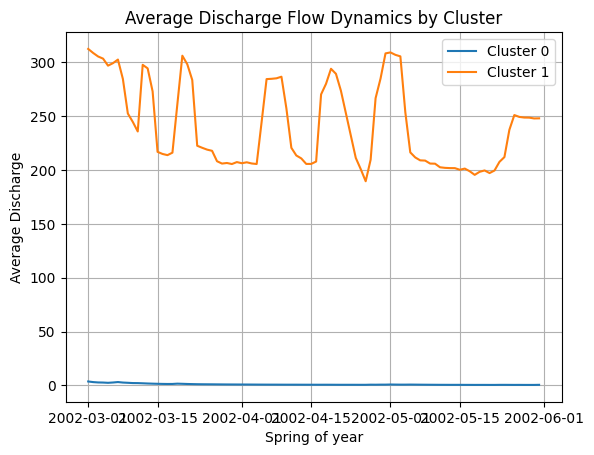

In [281]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [282]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [283]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2002-03-01  3.952552  2.104383  2.628793  2.411339  1.661892  3.339721   
2002-03-02  2.050030  1.609403  1.754880  1.894788  1.262341  3.325642   
2002-03-03  1.815048  1.460839  1.428414  1.756101  1.225882  3.294194   
2002-03-04  1.942694  1.410455  1.390839  1.761051  1.287151  3.199349   
2002-03-05  1.719548  1.306794  1.239340  1.601370  1.137048  3.100920   
...              ...       ...       ...       ...       ...       ...   
2002-05-27  0.857112  0.734239  0.361238  0.886044  0.603879  0.662444   
2002-05-28  0.851443  0.689612  0.337831  0.879259  0.590065  0.654662   
2002-05-29  0.866550  0.664338  0.341835  0.874625  0.586238  0.637981   
2002-05-30  1.027168  0.668637  0.341527  0.911865  0.597803  0.621284   
2002-05-31  0.998831  0.711762  0.326282  0.951885  0.640232  0.619081   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-03-01  3.754958  2.171611  3.356571  2.488239  ...  1.898292  3.291390   
2002-03-02  3.464406  1.817170  2.045464  1.984600  ...  1.908308  2.637187   
2002-03-03  3.209690  1.684841  1.925160  1.807748  ...  1.924382  2.306246   
2002-03-04  3.043123  1.682951  1.854442  1.771784  ...  1.934398  2.464072   
2002-03-05  2.801510  1.353752  1.601062  1.705295  ...  1.940457  2.235469   
...              ...       ...       ...       ...  ...       ...       ...   
2002-05-27  0.763728  0.461453  0.752651  0.914406  ...  0.182385  0.225964   
2002-05-28  0.747125  0.474905  0.761835  0.862658  ...  0.123651  0.192174   
2002-05-29  0.748977  0.781281  0.766695  0.871531  ...  0.108442  0.179165   
2002-05-30  0.754390  0.743343  0.834040  0.863021  ...  0.088658  0.168154   
2002-05-31  0.790478  0.738431  0.884650  0.855926  ...  0.088905  0.154636   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2002-03-01  4.138951  5.032840  6.586875  4.072969  3.882999  5.277389   
2002-03-02  3.112071  3.203102  5.675575  3.356501  3.327463  4.033451   
2002-03-03  2.644617  2.531868  5.205228  2.926652  2.705260  3.596050   
2002-03-04  3.516141  3.897848  5.951408  2.668550  2.486415  3.522192   
2002-03-05  2.966137  2.946036  5.214551  2.274711  2.176465  3.384074   
...              ...       ...       ...       ...       ...       ...   
2002-05-27  0.348567  0.173355  0.465971  0.264447  0.419802  1.235035   
2002-05-28  0.383040  0.173689  0.436568  0.255904  0.395589  1.190580   
2002-05-29  0.325584  0.160890  0.401812  0.249254  0.385033  1.157458   
2002-05-30  0.287280  0.147447  0.367056  0.255756  0.381977  1.154646   
2002-05-31  0.258552  0.133039  0.332299  0.266214  0.373831  1.229584   

             9000015  22000047  
2002-03-01  4.907628  1.071166  
2002-03-02  3.770354  1.039048  
2002-03-03  3.370458  1.014958  
2002-03-04  3.302933  1.008535  
2002-03-05  3.176658  0.986051  
...              ...       ...  
2002-05-27  1.211890  0.735524  
2002-05-28  1.171248  0.738736  
2002-05-29  1.140965  0.758007  
2002-05-30  1.138395  0.743553  
2002-05-31  1.206907  0.748371  

[92 rows x 281 columns]

<Axes: >

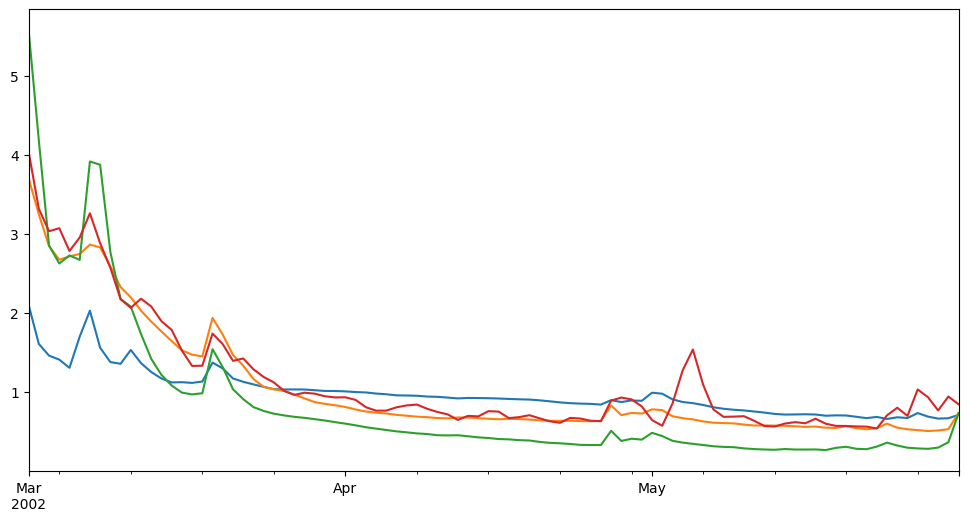

In [284]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

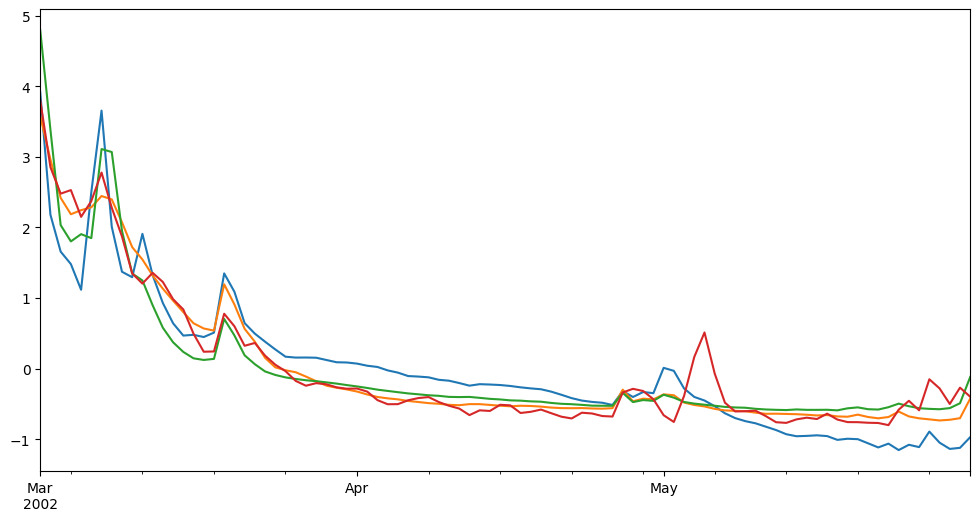

In [285]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

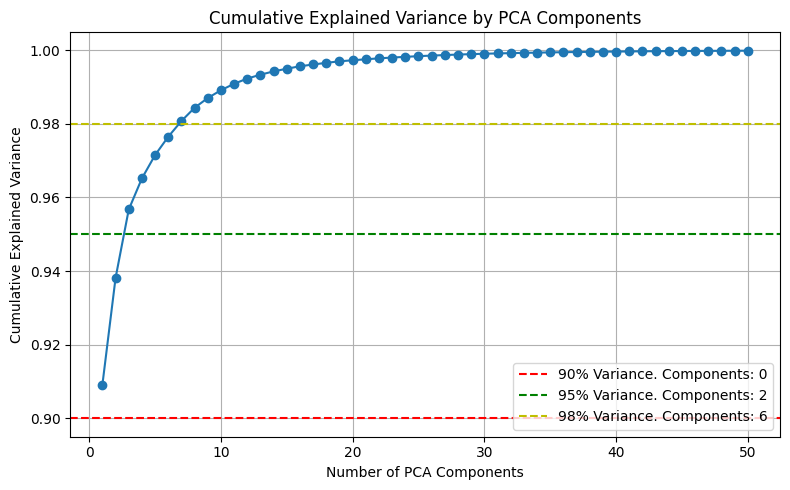

In [286]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [287]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 5.88088574e+01, -1.11993059e+01,  5.43842743e-01, ...,
        -4.66238667e-01, -2.36136873e-01,  3.23873018e-01],
       [ 4.54000777e+01, -6.96238794e+00, -5.00444450e+00, ...,
         5.94618192e-01,  6.35633980e-01, -6.62625961e-01],
       [ 3.82250909e+01, -4.19687373e+00, -5.16975017e+00, ...,
         5.96605912e-01, -4.88467744e-01,  5.06742033e-02],
       ...,
       [-1.26893995e+01, -2.49213334e+00, -2.14098539e-02, ...,
        -2.57876659e-01,  1.11116627e-01, -5.69209988e-02],
       [-1.27438435e+01, -2.55529619e+00,  4.66384106e-02, ...,
        -3.04426037e-01,  1.13760696e-01, -2.98353570e-01],
       [-1.04293707e+01, -1.80236209e+00,  2.35391135e+00, ...,
         6.25710695e-01,  9.11545129e-01, -1.08134835e+00]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


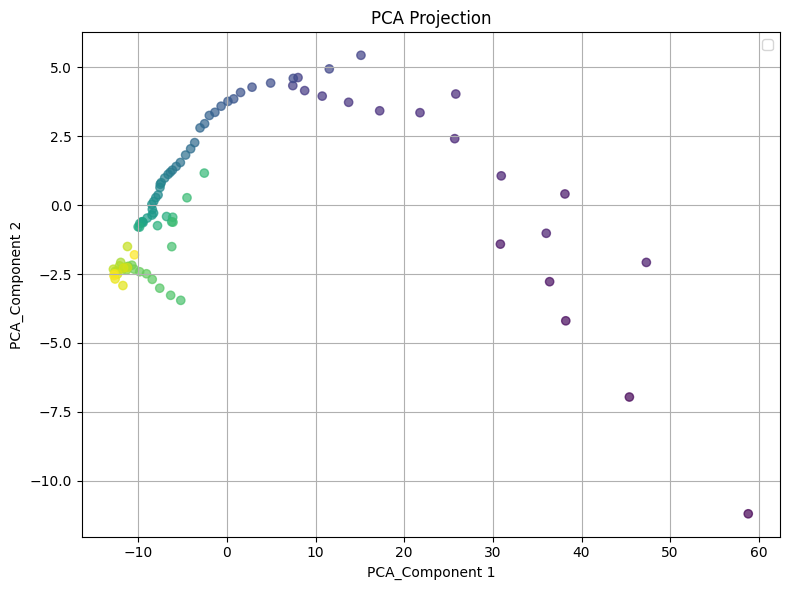

In [288]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


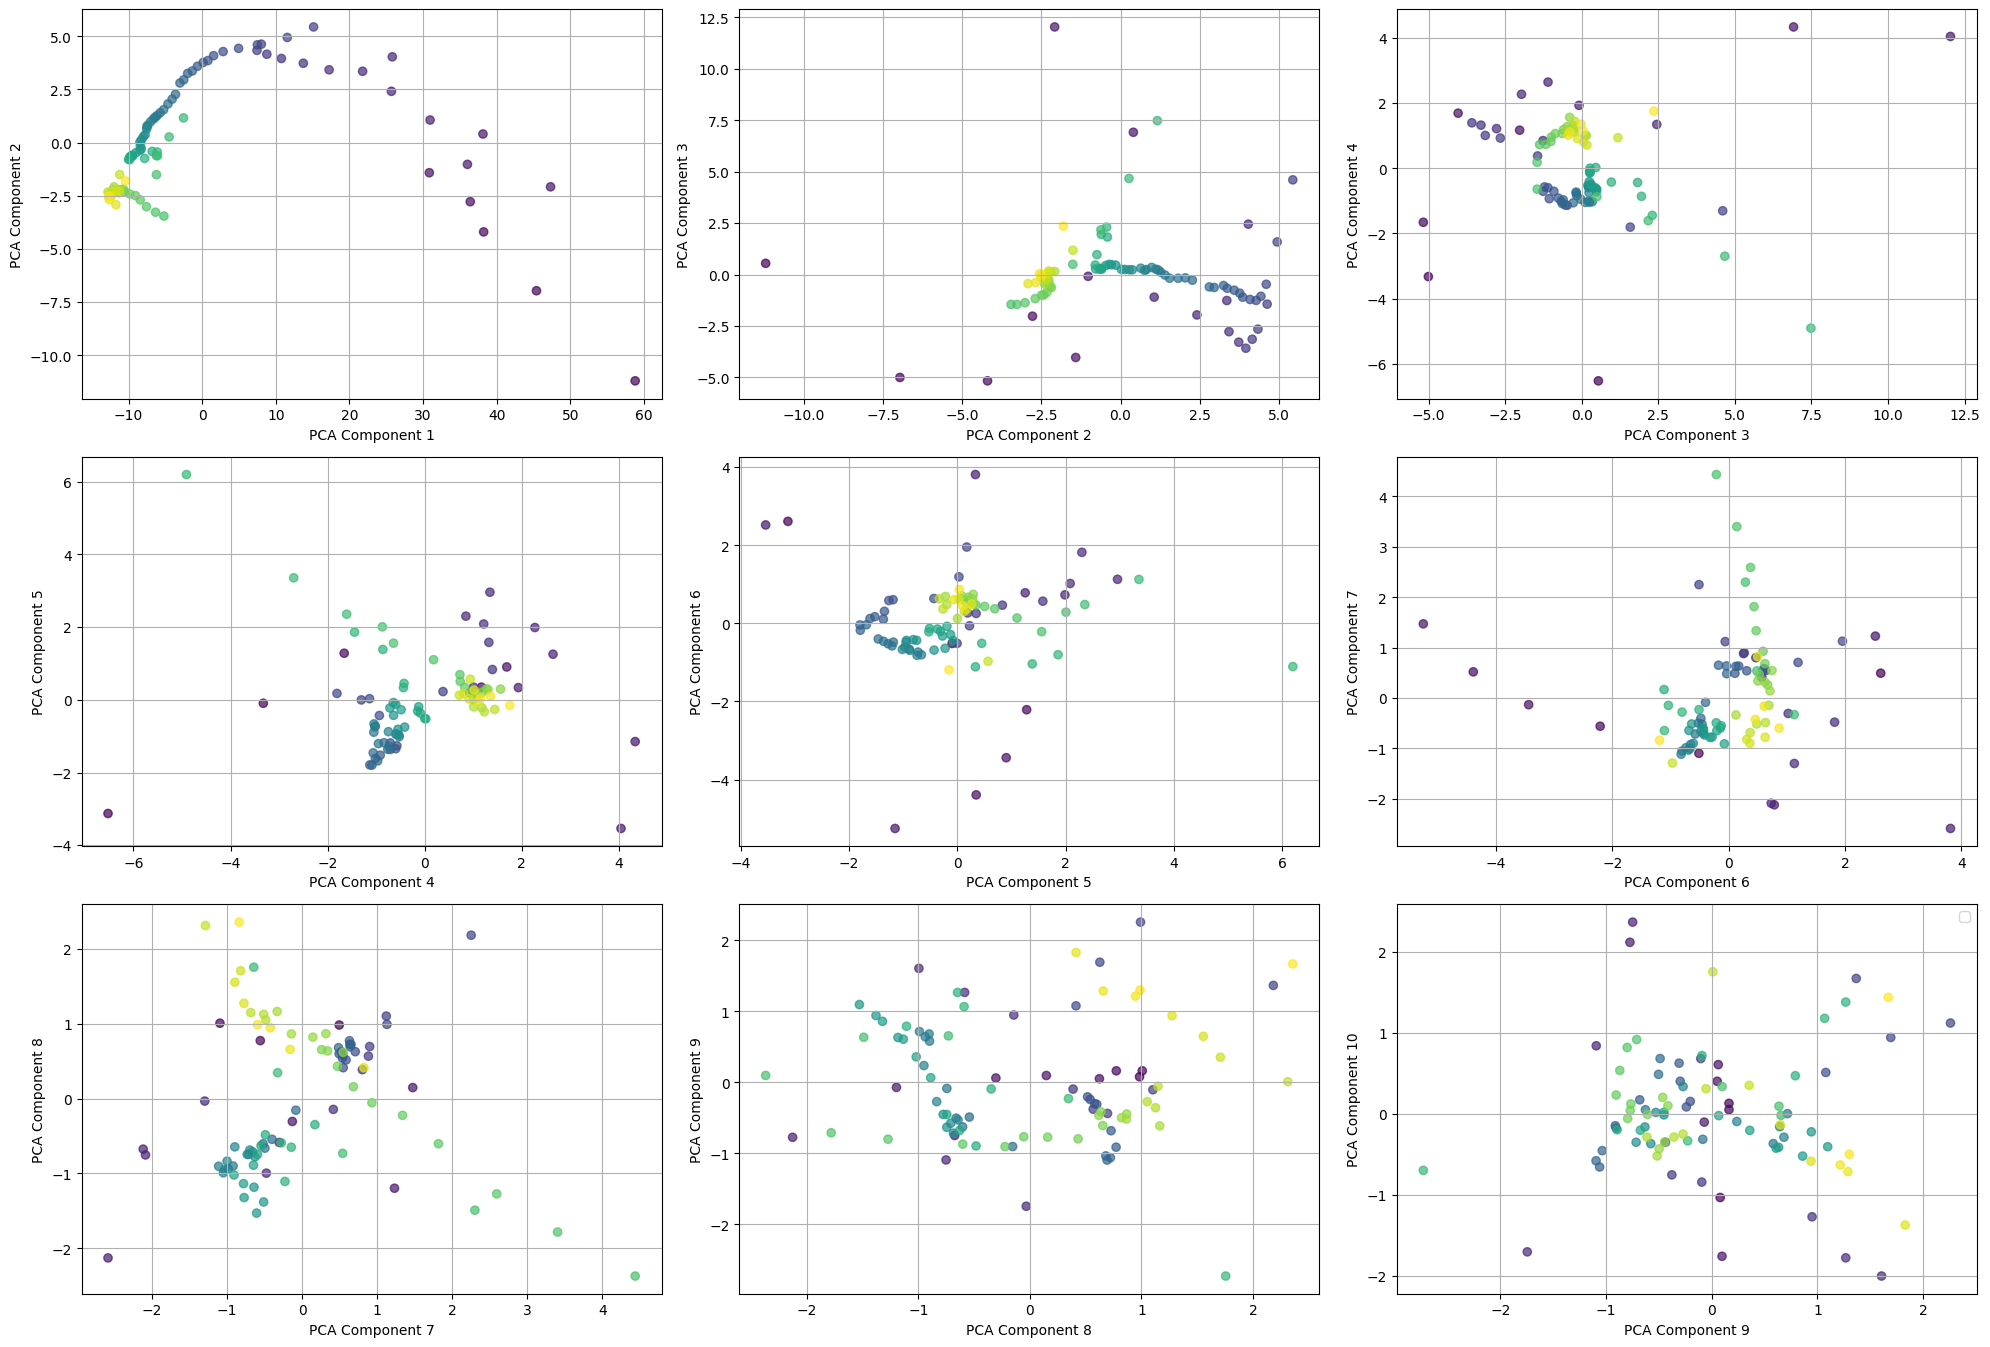

In [289]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [290]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.560
KMeans Davies-Bouldin Index is 0.539


<Axes: xlabel='k'>

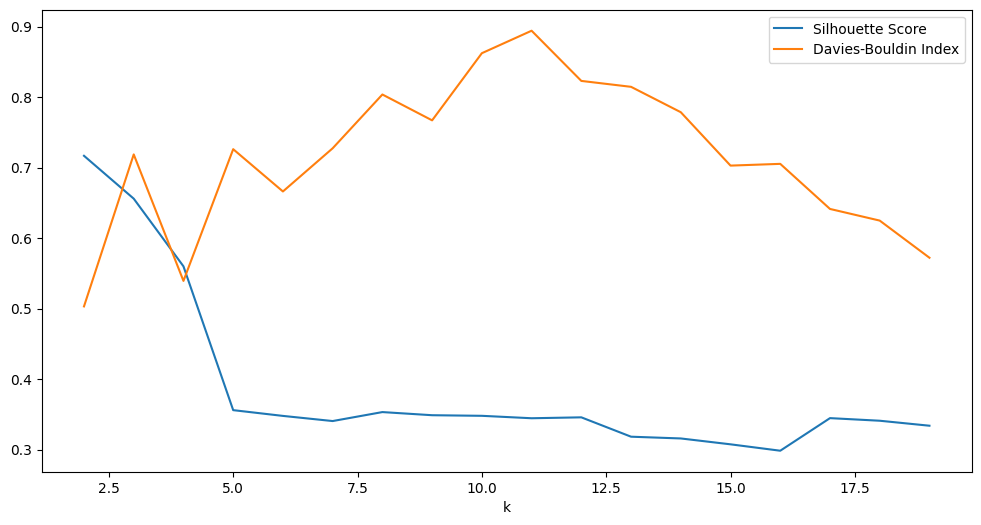

In [291]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         5     74         -0.328480   
2    1.01            3         5     57         -0.101806   
3    1.27            3         8     38          0.034249   
4    1.52            3         6     37          0.050907   
5    1.78            3         3     35          0.188764   
6    2.03            3         3     34          0.191851   
7    2.29            3         3     28          0.145629   
8    2.54            3         3     28          0.145629   
9    2.80            3         3     25          0.181704   
10   3.05            3         2     22          0.387257   
11   3.31            3         2     20          0.402928   
12   3.56            3         2     18          0.449712   
13   3.82            3         2     17          0.471382   
14   4.07            3         1     15               NaN   
15   4.33            3         1     15               NaN   
16   4.58            3         1     15               NaN   
17   4.84            3         1     15               NaN   
18   5.09            3         1     14               NaN   
19   5.35            3         1     13               NaN   
20   5.60            3         1     13               NaN   
21   5.86            3         1     13               NaN   
22   6.11            3         1     13               NaN   
23   6.37            3         2     10          0.565653   
24   6.62            3         3      6          0.565462   
25   6.88            3         2      6          0.588673   
26   7.13            3         2      5          0.577924   
27   7.39            3         1      4               NaN   
28   7.64            3         1      4               NaN   
29   7.90            3         1      4               NaN   
30   8.15            3         1      4               NaN   
31   8.41            3         1      3               NaN   
32   8.66            3         1      3               NaN   
33   8.92            3         1      3               NaN   
34   9.17            3         1      3               NaN   
35   9.43            3         1      3               NaN   
36   9.68            3         1      3               NaN   
37   9.94            3         1      3               NaN   
38  10.19            3         1      3               NaN   
39  10.45            3         1      3               NaN   
40  10.70            3         1      3               NaN   
41  10.96            3         1      3               NaN   
42  11.21            3         1      3               NaN   
43  11.47            3         1      2               NaN   
44  11.72            3         1      2               NaN   
45  11.98            3         1      2               NaN   
46  12.23            3         1      2               NaN   
47  12.49            3         1      2               NaN   
48  12.74            3         1      2               NaN   
49  13.00            3         1      2               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               1.750028  
2               1.393188  
3               1.156502  
4               1.273243  
5               1.167538  
6               1.141409  
7               1.645110  
8               1.645110  
9               1.386548  
10              1.252491  
11              1.064766  
12              0.995801  
13              0.843756  
14                   NaN  
15                   NaN  
16                   NaN  
17                   NaN  
18                   NaN  
19                   NaN  
20                   NaN  
21                   NaN  
22                   NaN  
23              1.556996  
24              1.871376  
25              1.924209  
26              1.976591  
27                   NaN  
28                   NaN  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

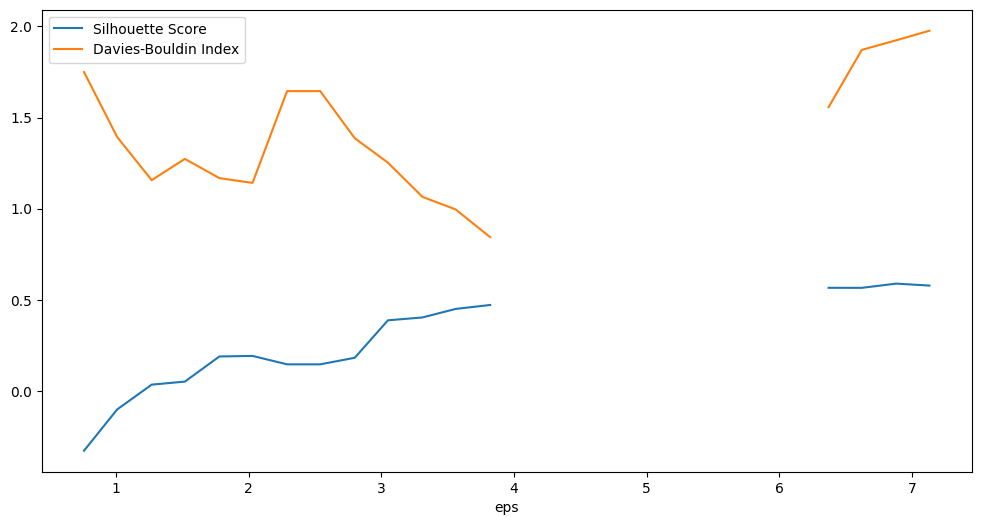

In [292]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

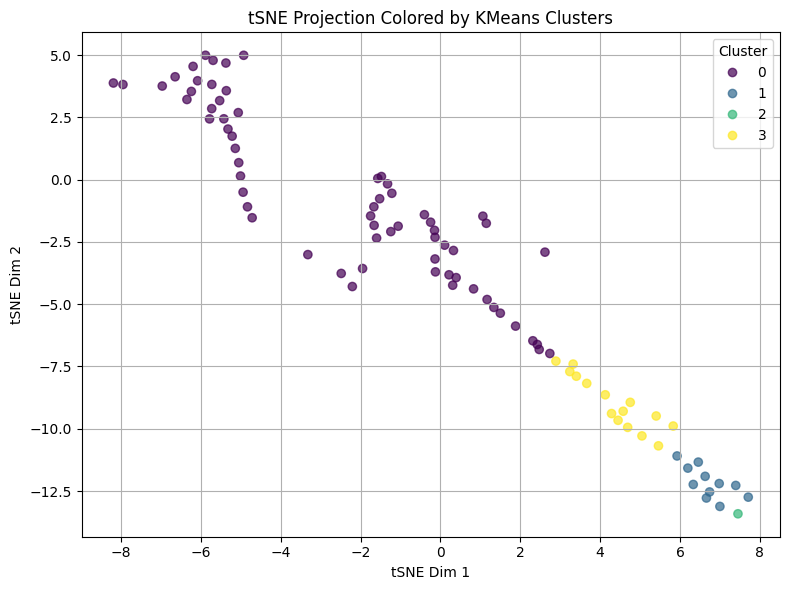

In [293]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        39    167          0.519660   
1    0.05            2        43    144          0.448261   
2    0.06            2        39    130          0.329323   
3    0.06            2        31    113          0.215851   
4    0.07            2        26    100          0.110088   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.803869   
196  0.99            2         2      2          0.803869   
197  0.99            2         2      2          0.803869   
198  1.00            2         2      2          0.803869   
199  1.00            2         2      2          0.803869   

     Davies-Bouldin Index  
0                0.520227  
1                0.602482  
2                0.661596  
3                0.792616  
4                0.747694  
..                    ...  
195              0.238076  
196              0.238076  
197              0.238076  
198              0.238076  
199              0.238076  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

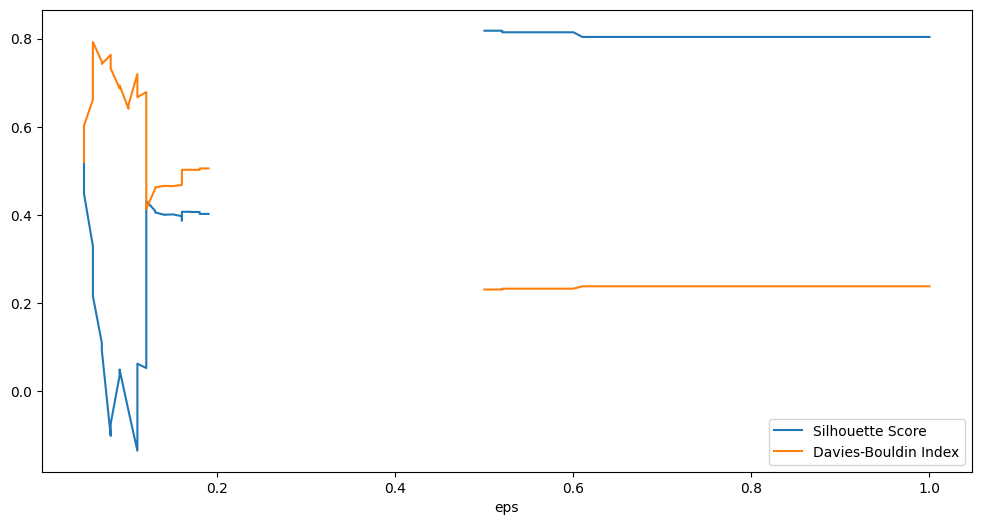

In [294]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [295]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [296]:
#Start with spring and work our way down to winter
season = 2
season_year = 2002
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2002-06-01 to 2002-08-31
Columns: 276 entries, 10000009 to 22000047
dtypes: float64(276)
memory usage: 199.1 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-06-01  1.046204  0.782069  0.315964  0.952182  0.621625  0.620560   
2002-06-02  0.909240  0.729103  0.301797  0.894855  0.574779  0.613931   
2002-06-03  0.867985  0.725158  0.297824  0.866904  0.565738  0.594479   
2002-06-04  0.841821  0.719798  0.300996  0.846081  0.558989  0.577698   
2002-06-05  0.824244  0.718866  0.285935  0.828183  0.551777  0.582224   
...              ...       ...       ...       ...       ...       ...   
2002-08-27  0.698503  0.657666  0.300780  0.783078  0.543094  0.624311   
2002-08-28  0.699884  0.657467  0.300903  0.784626  0.528733  0.606779   
2002-08-29  0.701665  0.660747  0.296468  0.786623  0.517442  0.590375   
2002-08-30  0.703114  0.661714  0.297023  0.788248  0.515045  0.584791   
2002-08-31  0.705211  0.659461  0.311683  0.790599  0.522783  0.568678   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-06-01  0.766413  0.661119  

          2002-06-01  2002-06-02  2002-06-03  2002-06-04  2002-06-05  \
10000009   -0.030565   -0.035493   -0.036162   -0.036974   -0.035566   
10000010   -0.048371   -0.047849   -0.045997   -0.045543   -0.043581   
10000011   -0.079793   -0.077160   -0.075422   -0.074952   -0.076513   
10000014   -0.036904   -0.036480   -0.036237   -0.036675   -0.035266   
10000016   -0.059187   -0.058435   -0.056974   -0.056835   -0.056291   
...              ...         ...         ...         ...         ...   
7000003    -0.083199   -0.080633   -0.079131   -0.079513   -0.081004   
8000001    -0.076532   -0.073870   -0.072481   -0.072776   -0.073855   
9000001    -0.018468   -0.016659   -0.017060   -0.017216   -0.012905   
9000015    -0.019974   -0.017945   -0.018124   -0.018168   -0.013929   
22000047   -0.052916   -0.049061   -0.048269   -0.045566   -0.042803   

          2002-06-06  2002-06-07  2002-06-08  2002-06-09  2002-06-10  ...  \
10000009   -0.033577   -0.032508   -0.031587   -0.030668  

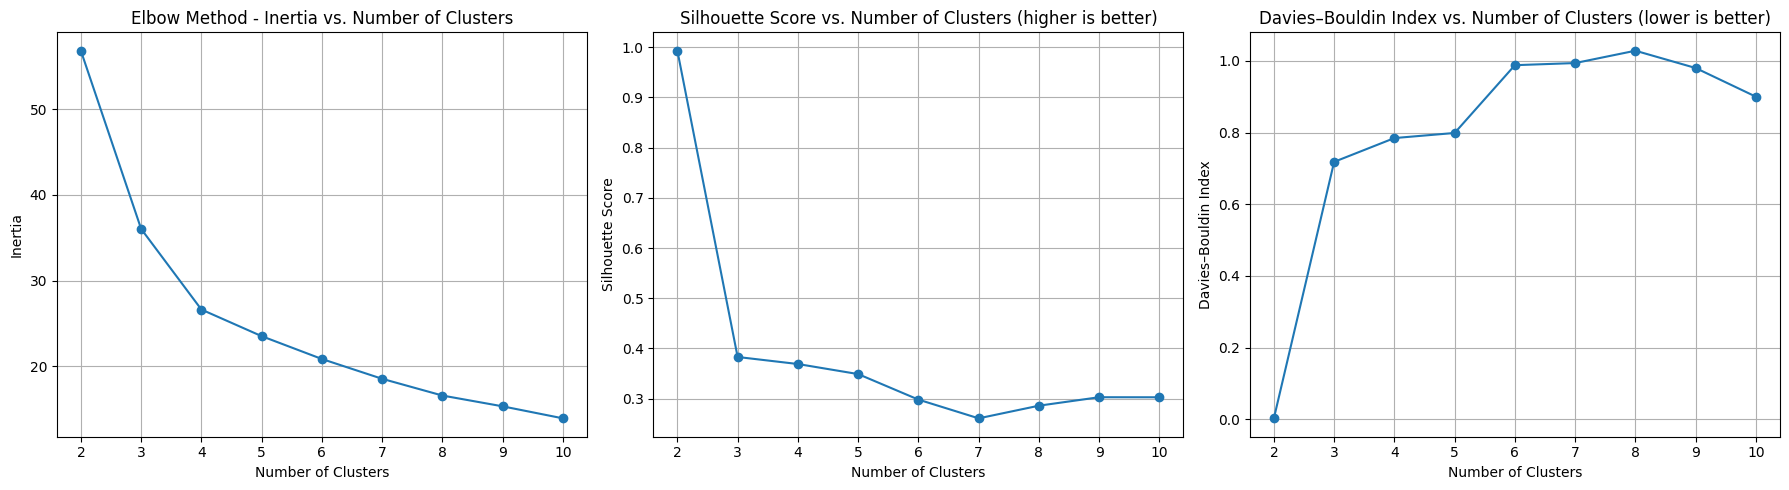

In [297]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        2
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-06-01  1.046204  0.782069  0.315964  0.952182  0.621625  0.620560   
2002-06-02  0.909240  0.729103  0.301797  0.894855  0.574779  0.613931   
2002-06-03  0.867985  0.725158  0.297824  0.866904  0.565738  0.594479   
2002-06-04  0.841821  0.719798  0.300996  0.846081  0.558989  0.577698   
2002-06-05  0.824244  0.718866  0.285935  0.828183  0.551777  0.582224   
...              ...       ...       ...       ...       ...       ...   
2002-08-27  0.698503  0.657666  0.300780  0.783078  0.543094  0.624311   
2002-08-28  0.699884  0.657467  0.300903  0.784626  0.528733  0.606779   
2002-08-29  0.701665  0.660747  0.296468  0.786623  0.517442  0.590375   
2002-08-30  0.703114  0.661714  0.297023  0.788248  0.515045  0.584791   
2002-08-31  0.705211  0.659461  0.311683  0.790599  0.522783  0.568678   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-06-01  0.766413  0.661119  

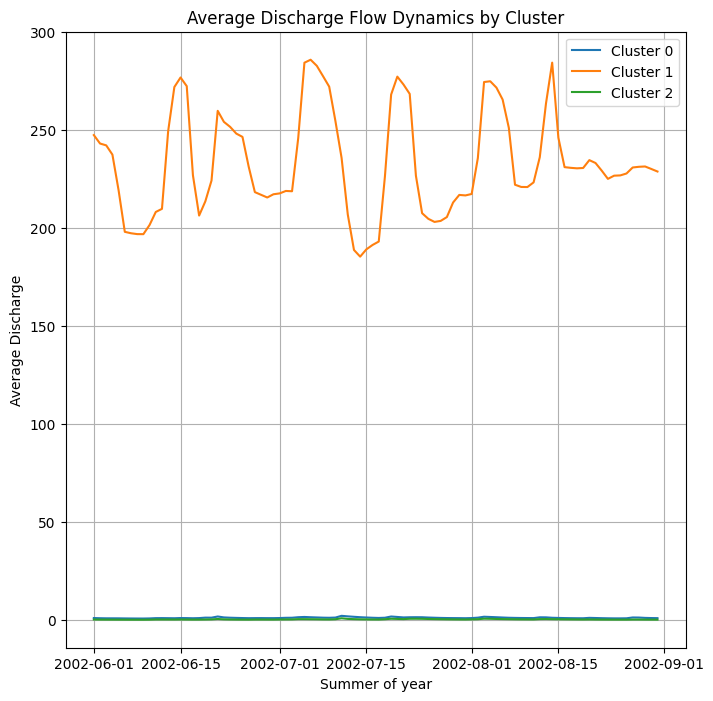

In [298]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [299]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [300]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2002-06-01  1.046204  0.782069  0.315964  0.952182  0.621625  0.620560   
2002-06-02  0.909240  0.729103  0.301797  0.894855  0.574779  0.613931   
2002-06-03  0.867985  0.725158  0.297824  0.866904  0.565738  0.594479   
2002-06-04  0.841821  0.719798  0.300996  0.846081  0.558989  0.577698   
2002-06-05  0.824244  0.718866  0.285935  0.828183  0.551777  0.582224   
...              ...       ...       ...       ...       ...       ...   
2002-08-27  0.698503  0.657666  0.300780  0.783078  0.543094  0.624311   
2002-08-28  0.699884  0.657467  0.300903  0.784626  0.528733  0.606779   
2002-08-29  0.701665  0.660747  0.296468  0.786623  0.517442  0.590375   
2002-08-30  0.703114  0.661714  0.297023  0.788248  0.515045  0.584791   
2002-08-31  0.705211  0.659461  0.311683  0.790599  0.522783  0.568678   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-06-01  0.766413  0.661119  0.898301  0.842031  ...  0.089400  0.143821   
2002-06-02  0.738376  0.570960  0.789299  0.823100  ...  0.079260  0.118604   
2002-06-03  0.727480  0.515035  0.753944  0.821157  ...  0.074191  0.107391   
2002-06-04  0.723896  0.475812  0.730478  0.816503  ...  0.070728  0.096623   
2002-06-05  0.712485  0.443315  0.713632  0.817560  ...  0.067761  0.090318   
...              ...       ...       ...       ...  ...       ...       ...   
2002-08-27  0.595618  0.418301  0.675297  0.864967  ...  0.051563  0.033156   
2002-08-28  0.586445  0.448681  0.669293  0.881393  ...  0.050326  0.034816   
2002-08-29  0.561784  0.422230  0.664478  0.845239  ...  0.047482  0.037221   
2002-08-30  0.575703  0.420039  0.675765  0.833222  ...  0.048471  0.037513   
2002-08-31  0.536252  0.432811  0.693837  0.821596  ...  0.057745  0.038292   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2002-06-01  0.235570  0.126605  0.297543  0.265433  0.364326  1.225654   
2002-06-02  0.208757  0.116050  0.262787  0.251165  0.349770  1.183812   
2002-06-03  0.185774  0.100975  0.228030  0.243957  0.340545  1.145398   
2002-06-04  0.157046  0.096855  0.193274  0.236052  0.331995  1.123180   
2002-06-05  0.132149  0.090443  0.158518  0.226889  0.320877  1.122154   
...              ...       ...       ...       ...       ...       ...   
2002-08-27  0.018721  0.030355  0.019447  0.430196  0.644355  0.846347   
2002-08-28  0.021584  0.029758  0.013893  0.415307  0.629473  0.830804   
2002-08-29  0.021724  0.027280  0.013849  0.397645  0.628451  0.838528   
2002-08-30  0.019301  0.023142  0.010412  0.386022  0.603973  0.888069   
2002-08-31  0.018821  0.022855  0.008726  0.383003  0.582041  0.873950   

             9000015  22000047  
2002-06-01  1.203314  0.714646  
2002-06-02  1.165059  0.711434  
2002-06-03  1.129940  0.692163  
2002-06-04  1.109627  0.719464  
2002-06-05  1.108689  0.729100  
...              ...       ...  
2002-08-27  0.856531  0.870423  
2002-08-28  0.842321  0.868817  
2002-08-29  0.849382  0.867211  
2002-08-30  0.894675  0.916996  
2002-08-31  0.881767  0.899330  

[92 rows x 276 columns]

<Axes: >

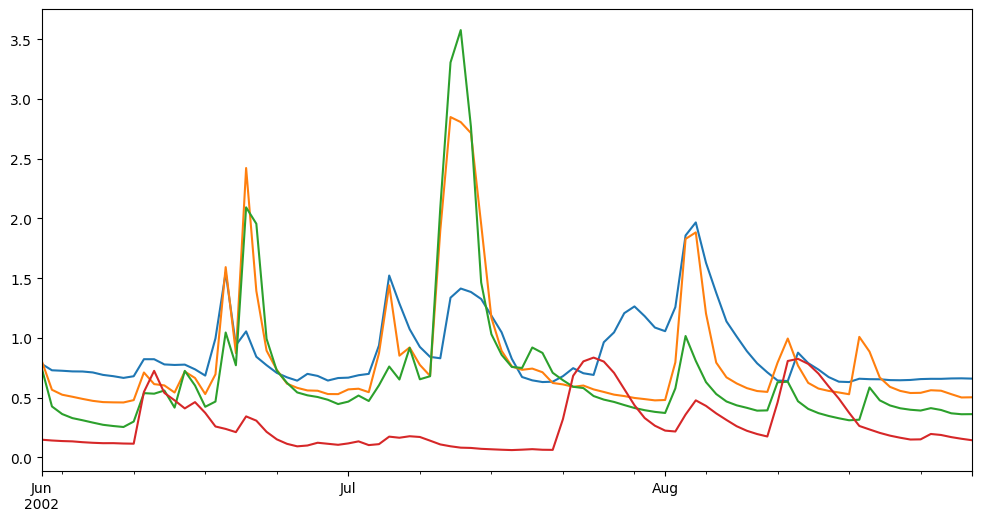

In [301]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

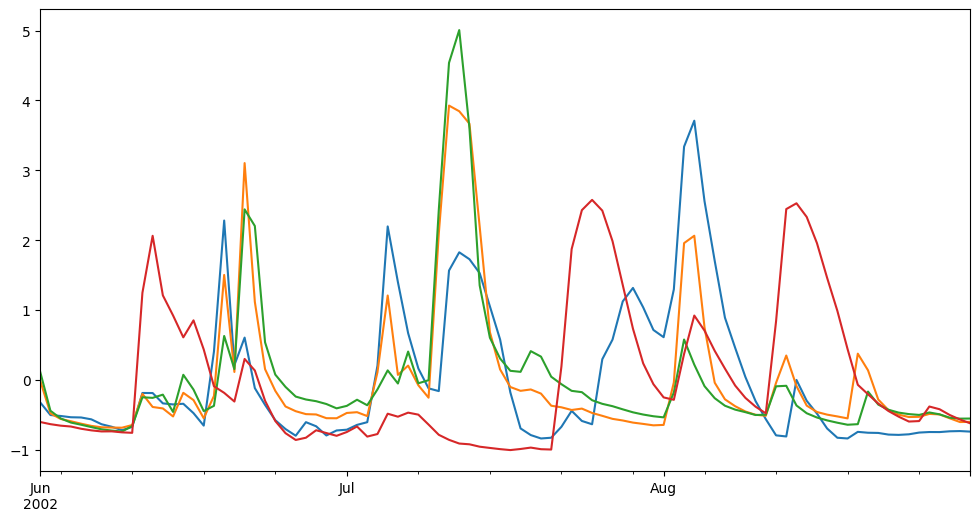

In [302]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

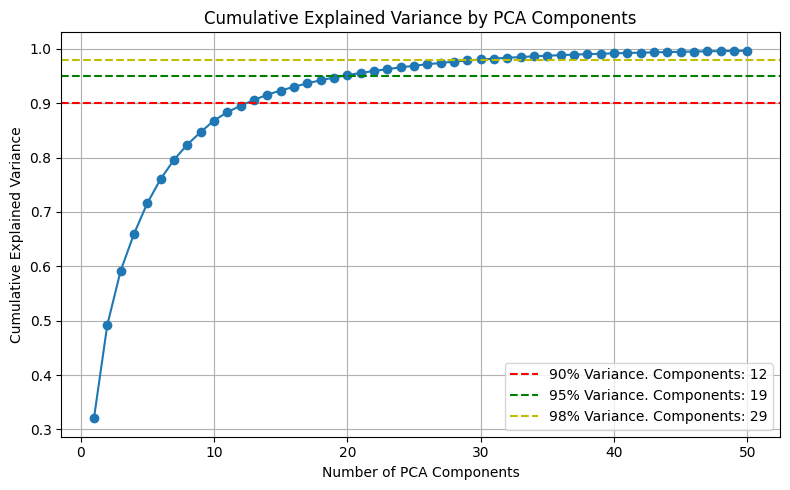

In [303]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [304]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-2.04540286, -1.92166651, -3.21669429, ...,  1.95367619,
        -0.99750705, -0.17353133],
       [-5.69397983, -1.8947005 , -2.81500153, ...,  1.34861234,
        -0.8335342 ,  0.17018954],
       [-7.39376346, -2.0221691 , -2.60183223, ...,  0.7545028 ,
        -0.6213221 ,  0.10598264],
       ...,
       [-7.07179163, -1.26352288,  4.279686  , ...,  1.35243623,
         0.41000899,  1.19429483],
       [-8.12292191, -1.62204134,  2.85638795, ...,  1.34205551,
        -0.1257286 ,  1.30751837],
       [-8.73650545, -1.82825217,  1.72674482, ...,  0.87537676,
        -0.42495427,  1.12811655]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


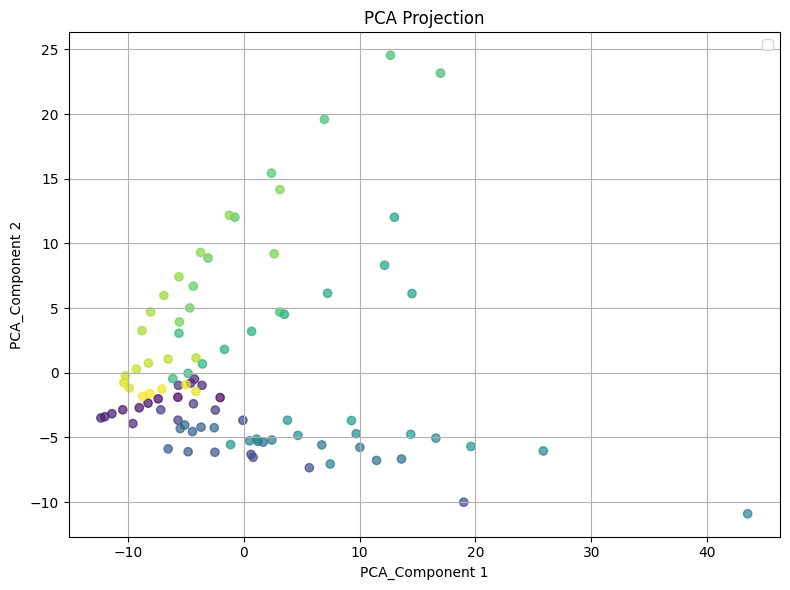

In [305]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


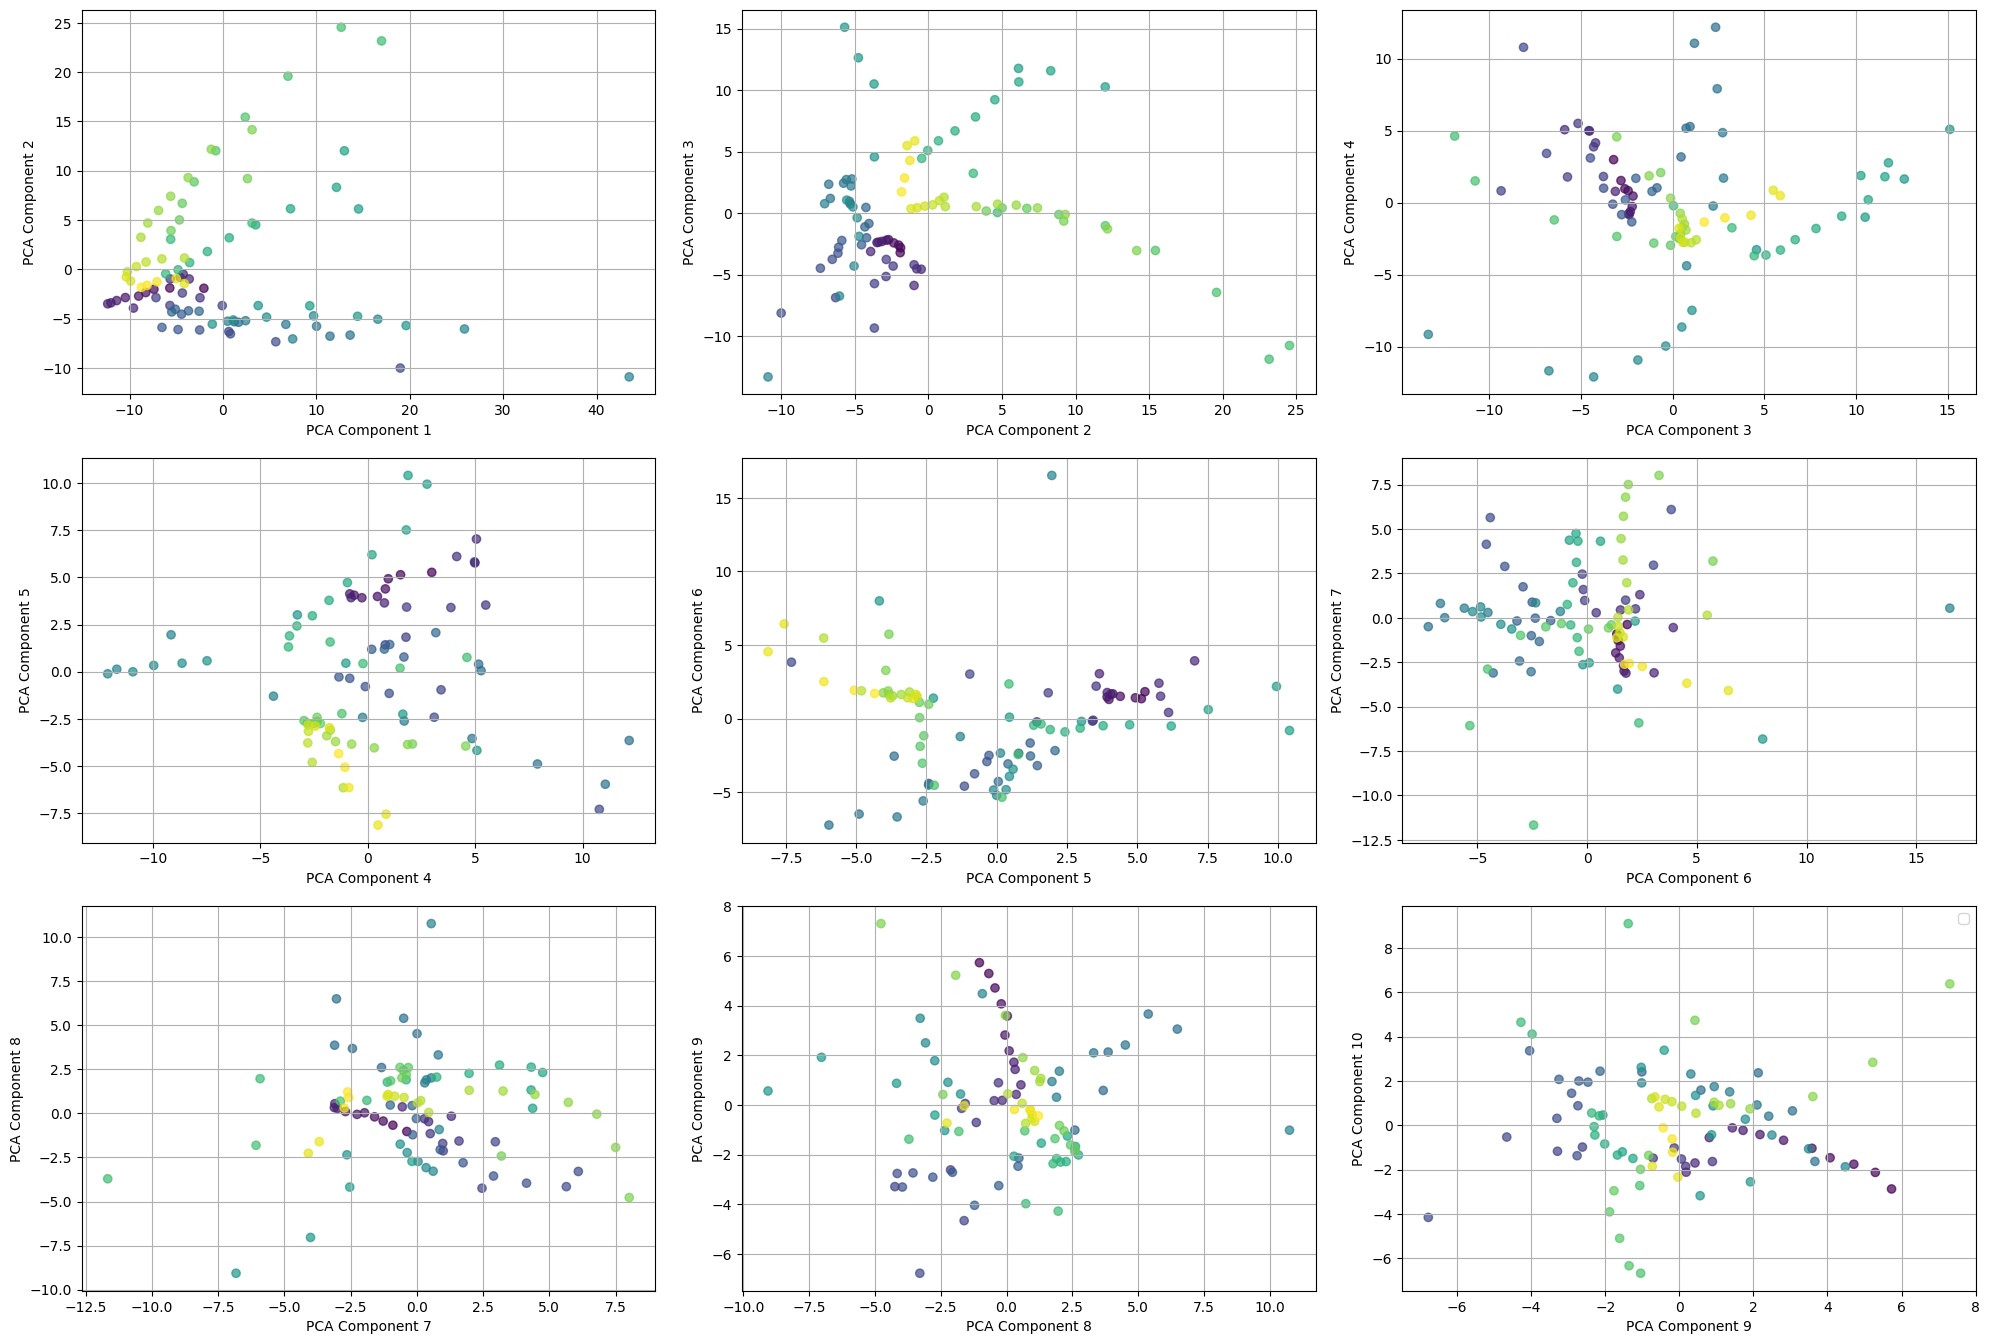

In [306]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [307]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.216
KMeans Davies-Bouldin Index is 1.685


<Axes: xlabel='k'>

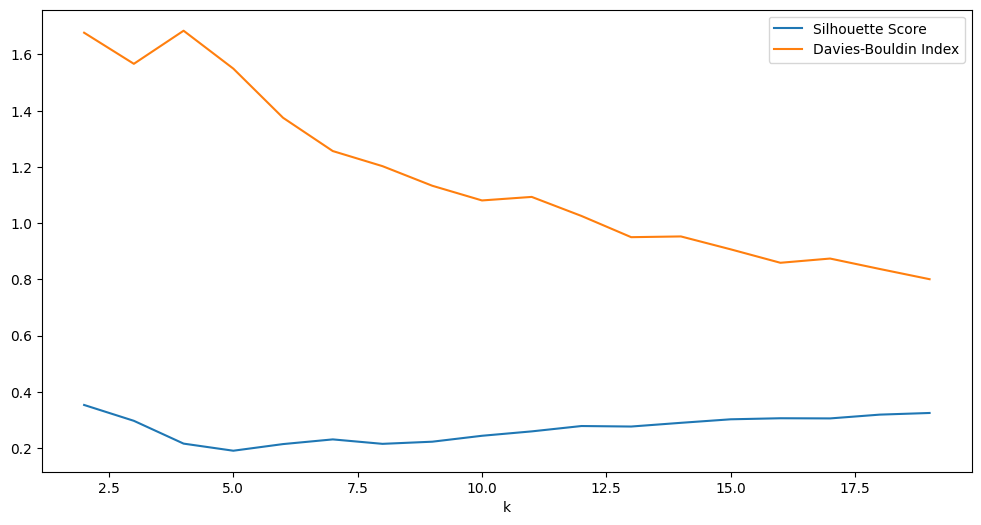

In [308]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         0     92               NaN   
4    1.52            3         2     86         -0.161640   
5    1.78            3         2     83         -0.126449   
6    2.03            3         3     80         -0.115853   
7    2.29            3         2     79         -0.092614   
8    2.54            3         4     72         -0.095665   
9    2.80            3         4     72         -0.095665   
10   3.05            3         7     61         -0.043842   
11   3.31            3         9     55          0.009009   
12   3.56            3         9     53          0.026740   
13   3.82            3         9     52          0.031687   
14   4.07            3         9     50          0.051083   
15   4.33            3         9     45          0.089173   
16   4.58            3         9     39          0.107320   
17   4.84            3         9     39          0.107320   
18   5.09            3         8     39          0.123860   
19   5.35            3         8     38          0.124750   
20   5.60            3         7     38          0.124749   
21   5.86            3         7     35          0.140928   
22   6.11            3         7     31          0.160662   
23   6.37            3         8     25          0.175583   
24   6.62            3         8     25          0.175583   
25   6.88            3         8     23          0.179449   
26   7.13            3         7     22          0.172958   
27   7.39            3         7     22          0.172958   
28   7.64            3         7     21          0.181063   
29   7.90            3         6     21          0.177405   
30   8.15            3         5     19          0.175194   
31   8.41            3         5     15          0.191611   
32   8.66            3         5     15          0.191611   
33   8.92            3         5     15          0.191611   
34   9.17            3         5     15          0.191611   
35   9.43            3         3     15          0.170764   
36   9.68            3         3     14          0.169190   
37   9.94            3         3     13          0.169149   
38  10.19            3         3     11          0.179839   
39  10.45            3         2     11          0.149363   
40  10.70            3         1     11               NaN   
41  10.96            3         1     11               NaN   
42  11.21            3         1     10               NaN   
43  11.47            3         1     10               NaN   
44  11.72            3         1     10               NaN   
45  11.98            3         1      9               NaN   
46  12.23            3         1      9               NaN   
47  12.49            3         1      9               NaN   
48  12.74            3         1      9               NaN   
49  13.00            3         1      8               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               1.212667  
5               1.270943  
6               1.255864  
7               1.347965  
8               1.424597  
9               1.424597  
10              1.473151  
11              1.394346  
12              1.391371  
13              1.415147  
14              1.393237  
15              1.413949  
16              1.437909  
17              1.437909  
18              1.454901  
19              1.489906  
20              1.541544  
21              1.553762  
22              1.493227  
23              1.580313  
24              1.580313  
25              1.543301  
26              1.607346  
27              1.607346  
28              1.616990  
29              1.686624  
30              1.756854  
31              1.698514  
32 

<Axes: xlabel='eps'>

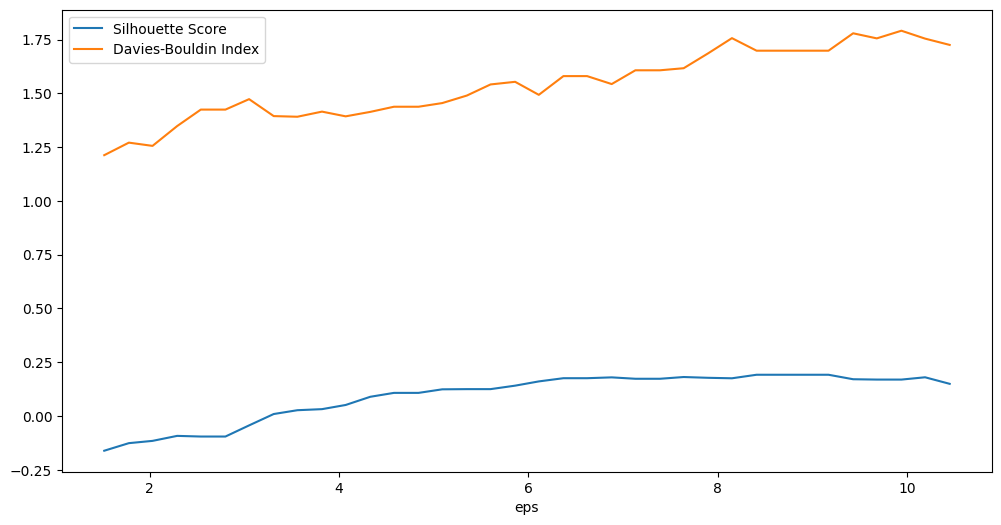

In [309]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

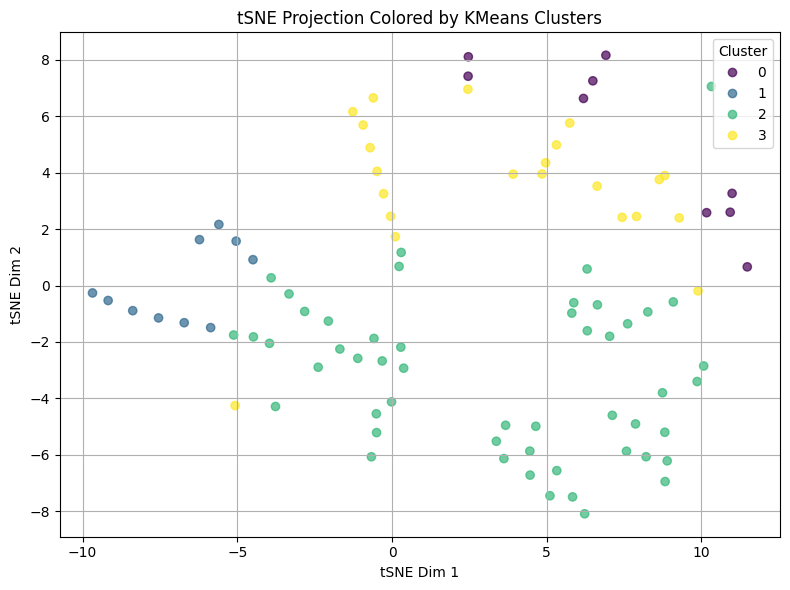

In [310]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        28    139          0.492516              0.473169
1   0.05            2        24    127          0.441966              0.549334
2   0.06            2        21    114          0.381475              0.525616
3   0.06            2        19    100          0.325333              0.630927
4   0.07            2        16     96          0.198836              0.666343
..   ...          ...       ...    ...               ...                   ...
95  0.48            2         2      3          0.784756              0.222558
96  0.49            2         2      3          0.784756              0.222558
97  0.49            2         2      3          0.784756              0.222558
98  0.50            2         2      3          0.784756              0.222558
99  0.50            2         2      3          0.784756              0.222558

[100 rows x 6 columns]

<Axes: xlabel='eps'>

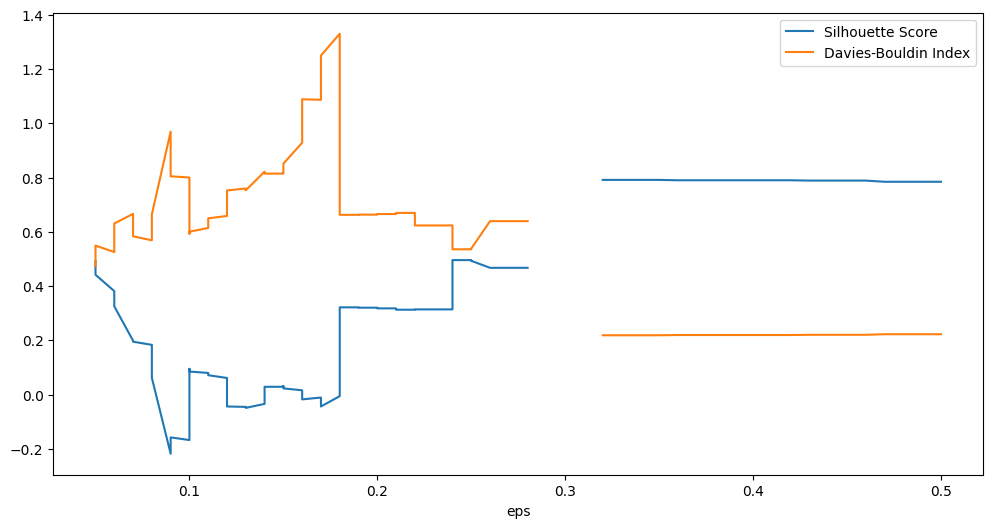

In [311]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 0.5, 100)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [312]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [313]:
#Start with spring and work our way down to winter
season = 3
season_year = 2002
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2002-09-01 to 2002-11-30
Columns: 273 entries, 10000009 to 22000047
dtypes: float64(273)
memory usage: 194.8 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-09-01  0.704188  0.665745  0.307864  0.789452  0.506383  0.574021   
2002-09-02  0.699696  0.664882  0.307186  0.784416  0.492127  0.563699   
2002-09-03  0.691283  0.665538  0.308295  0.774984  0.487544  0.549864   
2002-09-04  0.686621  0.668809  0.331733  0.769757  0.485925  0.539182   
2002-09-05  0.688939  0.739936  0.349227  0.772356  0.488385  0.522626   
...              ...       ...       ...       ...       ...       ...   
2002-11-26  1.604362  1.441115  1.698457  1.624094  1.386413  1.159869   
2002-11-27  2.364699  1.436687  1.600486  1.707146  0.820612  1.218005   
2002-11-28  1.294079  1.045497  1.299429  1.351461  0.714979  1.250598   
2002-11-29  1.107217  1.015605  1.144295  1.240687  0.745760  1.271988   
2002-11-30  1.298634  1.344041  1.804127  1.392208  1.004187  1.304776   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-09-01  0.521498  0.420870  

          2002-09-01  2002-09-02  2002-09-03  2002-09-04  2002-09-05  \
10000009   -0.047414   -0.046293   -0.046381   -0.046040   -0.044484   
10000010   -0.050248   -0.048923   -0.048346   -0.047424   -0.040436   
10000011   -0.076625   -0.075949   -0.075612   -0.073622   -0.071454   
10000014   -0.041130   -0.039892   -0.039992   -0.039579   -0.037862   
10000016   -0.061993   -0.061976   -0.061931   -0.061638   -0.060406   
...              ...         ...         ...         ...         ...   
7000003    -0.071941   -0.072231   -0.071242   -0.070244   -0.066957   
8000001    -0.057350   -0.058024   -0.058365   -0.058097   -0.057324   
9000001    -0.033383   -0.032246   -0.035840   -0.035808   -0.034932   
9000015    -0.032937   -0.031731   -0.034952   -0.034829   -0.033871   
22000047   -0.034334   -0.031452   -0.031237   -0.030007   -0.028546   

          2002-09-06  2002-09-07  2002-09-08  2002-09-09  2002-09-10  ...  \
10000009   -0.045449   -0.044663   -0.036935   -0.036319  

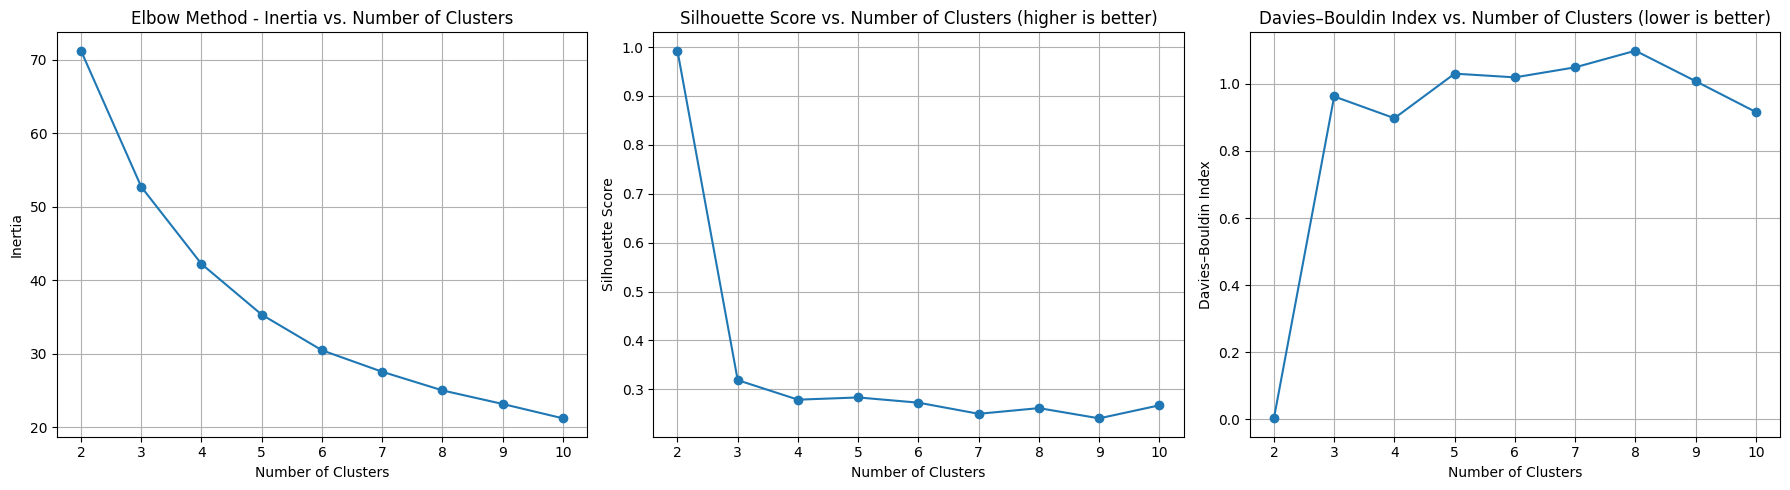

In [314]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        2
10000011        2
10000014        2
10000016        2

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-09-01  0.704188  0.665745  0.307864  0.789452  0.506383  0.574021   
2002-09-02  0.699696  0.664882  0.307186  0.784416  0.492127  0.563699   
2002-09-03  0.691283  0.665538  0.308295  0.774984  0.487544  0.549864   
2002-09-04  0.686621  0.668809  0.331733  0.769757  0.485925  0.539182   
2002-09-05  0.688939  0.739936  0.349227  0.772356  0.488385  0.522626   
...              ...       ...       ...       ...       ...       ...   
2002-11-26  1.604362  1.441115  1.698457  1.624094  1.386413  1.159869   
2002-11-27  2.364699  1.436687  1.600486  1.707146  0.820612  1.218005   
2002-11-28  1.294079  1.045497  1.299429  1.351461  0.714979  1.250598   
2002-11-29  1.107217  1.015605  1.144295  1.240687  0.745760  1.271988   
2002-11-30  1.298634  1.344041  1.804127  1.392208  1.004187  1.304776   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-09-01  0.521498  0.420870  

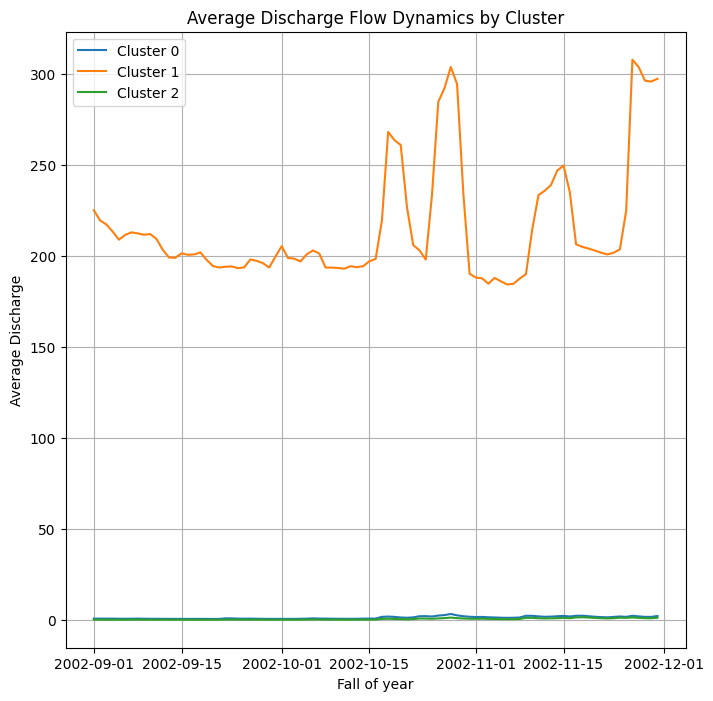

In [315]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [316]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [317]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2002-09-01  0.704188  0.665745  0.307864  0.789452  0.506383  0.574021   
2002-09-02  0.699696  0.664882  0.307186  0.784416  0.492127  0.563699   
2002-09-03  0.691283  0.665538  0.308295  0.774984  0.487544  0.549864   
2002-09-04  0.686621  0.668809  0.331733  0.769757  0.485925  0.539182   
2002-09-05  0.688939  0.739936  0.349227  0.772356  0.488385  0.522626   
...              ...       ...       ...       ...       ...       ...   
2002-11-26  1.604362  1.441115  1.698457  1.624094  1.386413  1.159869   
2002-11-27  2.364699  1.436687  1.600486  1.707146  0.820612  1.218005   
2002-11-28  1.294079  1.045497  1.299429  1.351461  0.714979  1.250598   
2002-11-29  1.107217  1.015605  1.144295  1.240687  0.745760  1.271988   
2002-11-30  1.298634  1.344041  1.804127  1.392208  1.004187  1.304776   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-09-01  0.521498  0.420870  0.680566  0.819395  ...  0.062691  0.038419   
2002-09-02  0.504286  0.409761  0.671552  0.801611  ...  0.058363  0.033345   
2002-09-03  0.497570  0.403035  0.664017  0.815712  ...  0.057621  0.035507   
2002-09-04  0.489339  0.408929  0.659789  0.824474  ...  0.055025  0.036603   
2002-09-05  0.483966  0.404395  0.666016  0.841180  ...  0.050821  0.033198   
...              ...       ...       ...       ...  ...       ...       ...   
2002-11-26  1.980097  1.895767  2.707318  1.825028  ...  0.633836  1.004568   
2002-11-27  1.875567  1.235479  2.558622  1.848525  ...  0.641502  0.848908   
2002-11-28  1.479175  1.016693  1.531911  1.451884  ...  0.687995  0.789860   
2002-11-29  1.297100  0.944672  1.298148  1.347271  ...  0.721999  0.761379   
2002-11-30  1.636572  1.073147  1.786852  1.694614  ...  0.772819  0.704392   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2002-09-01  0.017499  0.020365  0.007551  0.371407  0.569378  0.894564   
2002-09-02  0.016779  0.018262  0.006102  0.356395  0.544424  0.885610   
2002-09-03  0.017339  0.017616  0.005162  0.365560  0.534261  0.829382   
2002-09-04  0.016492  0.017501  0.005012  0.375191  0.531486  0.818274   
2002-09-05  0.015438  0.019216  0.006592  0.405873  0.527211  0.809255   
...              ...       ...       ...       ...       ...       ...   
2002-11-26  1.160324  0.963731  1.921699  2.541738  2.835746  2.144763   
2002-11-27  1.059920  0.925161  1.814419  2.894266  3.089618  2.171304   
2002-11-28  0.949000  0.874720  1.647624  2.418661  2.581435  1.926955   
2002-11-29  0.952903  0.878081  1.666471  2.163991  2.246132  1.825955   
2002-11-30  0.910292  0.843865  1.530216  2.780857  3.604953  2.062063   

             9000015  22000047  
2002-09-01  0.900614  0.881665  
2002-09-02  0.892428  0.896118  
2002-09-03  0.841021  0.889695  
2002-09-04  0.830865  0.892906  
2002-09-05  0.822619  0.889695  
...              ...       ...  
2002-11-26  2.043613  0.971598  
2002-11-27  2.067878  0.705011  
2002-11-28  1.844481  0.648803  
2002-11-29  1.752142  0.631137  
2002-11-30  1.968004  0.642379  

[91 rows x 273 columns]

<Axes: >

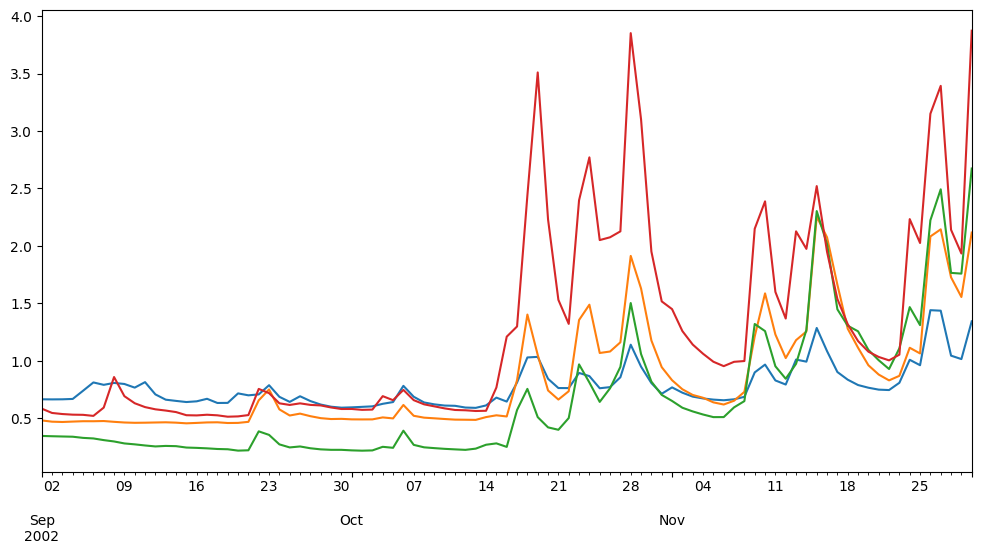

In [318]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

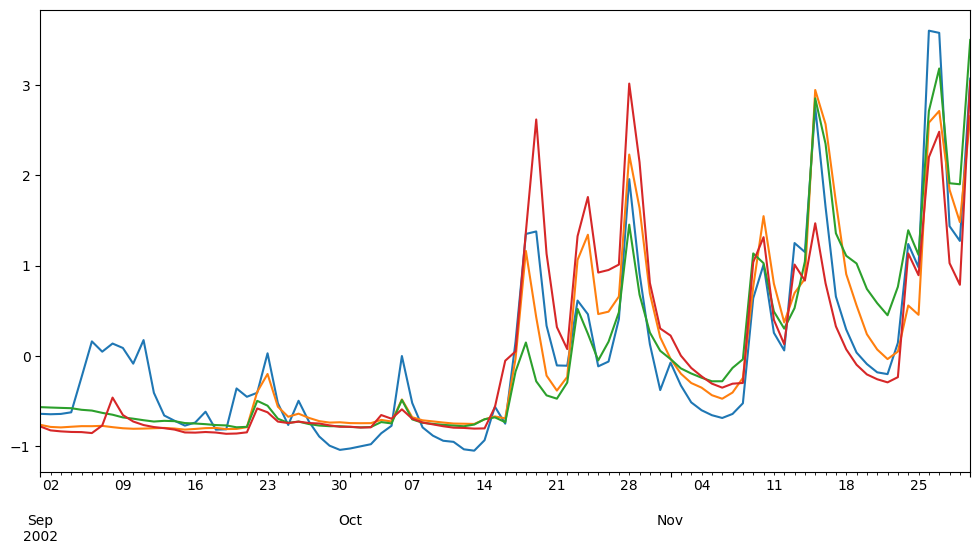

In [319]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

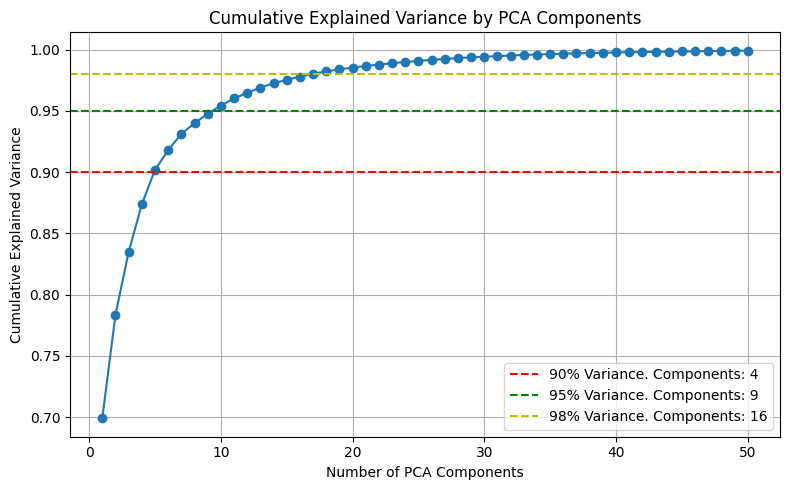

In [320]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [321]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-10.78412158,  -0.13397222,  -1.26939909, ...,   0.3780361 ,
         -0.46423258,   0.34601081],
       [-11.50936252,   0.11179534,  -1.13087993, ...,   0.36411621,
         -0.39141714,   0.04173823],
       [-11.74834258,   0.16225434,  -1.03521885, ...,   0.31411432,
         -0.42825353,   0.11730969],
       ...,
       [ 16.14150657,  -0.37034575,   0.87508269, ...,  -0.54536205,
          0.51710442,   0.45056543],
       [ 15.22703018,  -1.05616742,   1.29443945, ...,   0.37636901,
          0.69129238,  -0.19703948],
       [ 24.89477478,  -6.30829873,   2.29672445, ...,   0.32188849,
         -0.11281992,   0.11597682]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


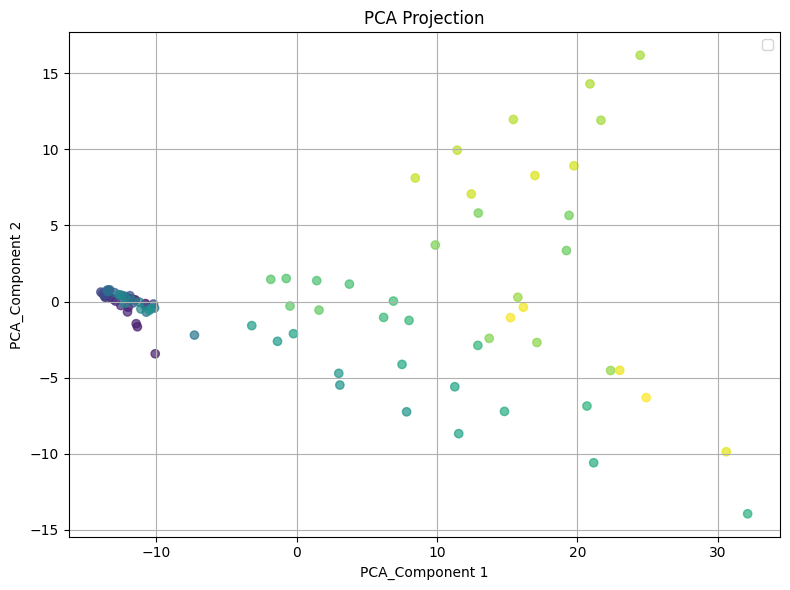

In [322]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


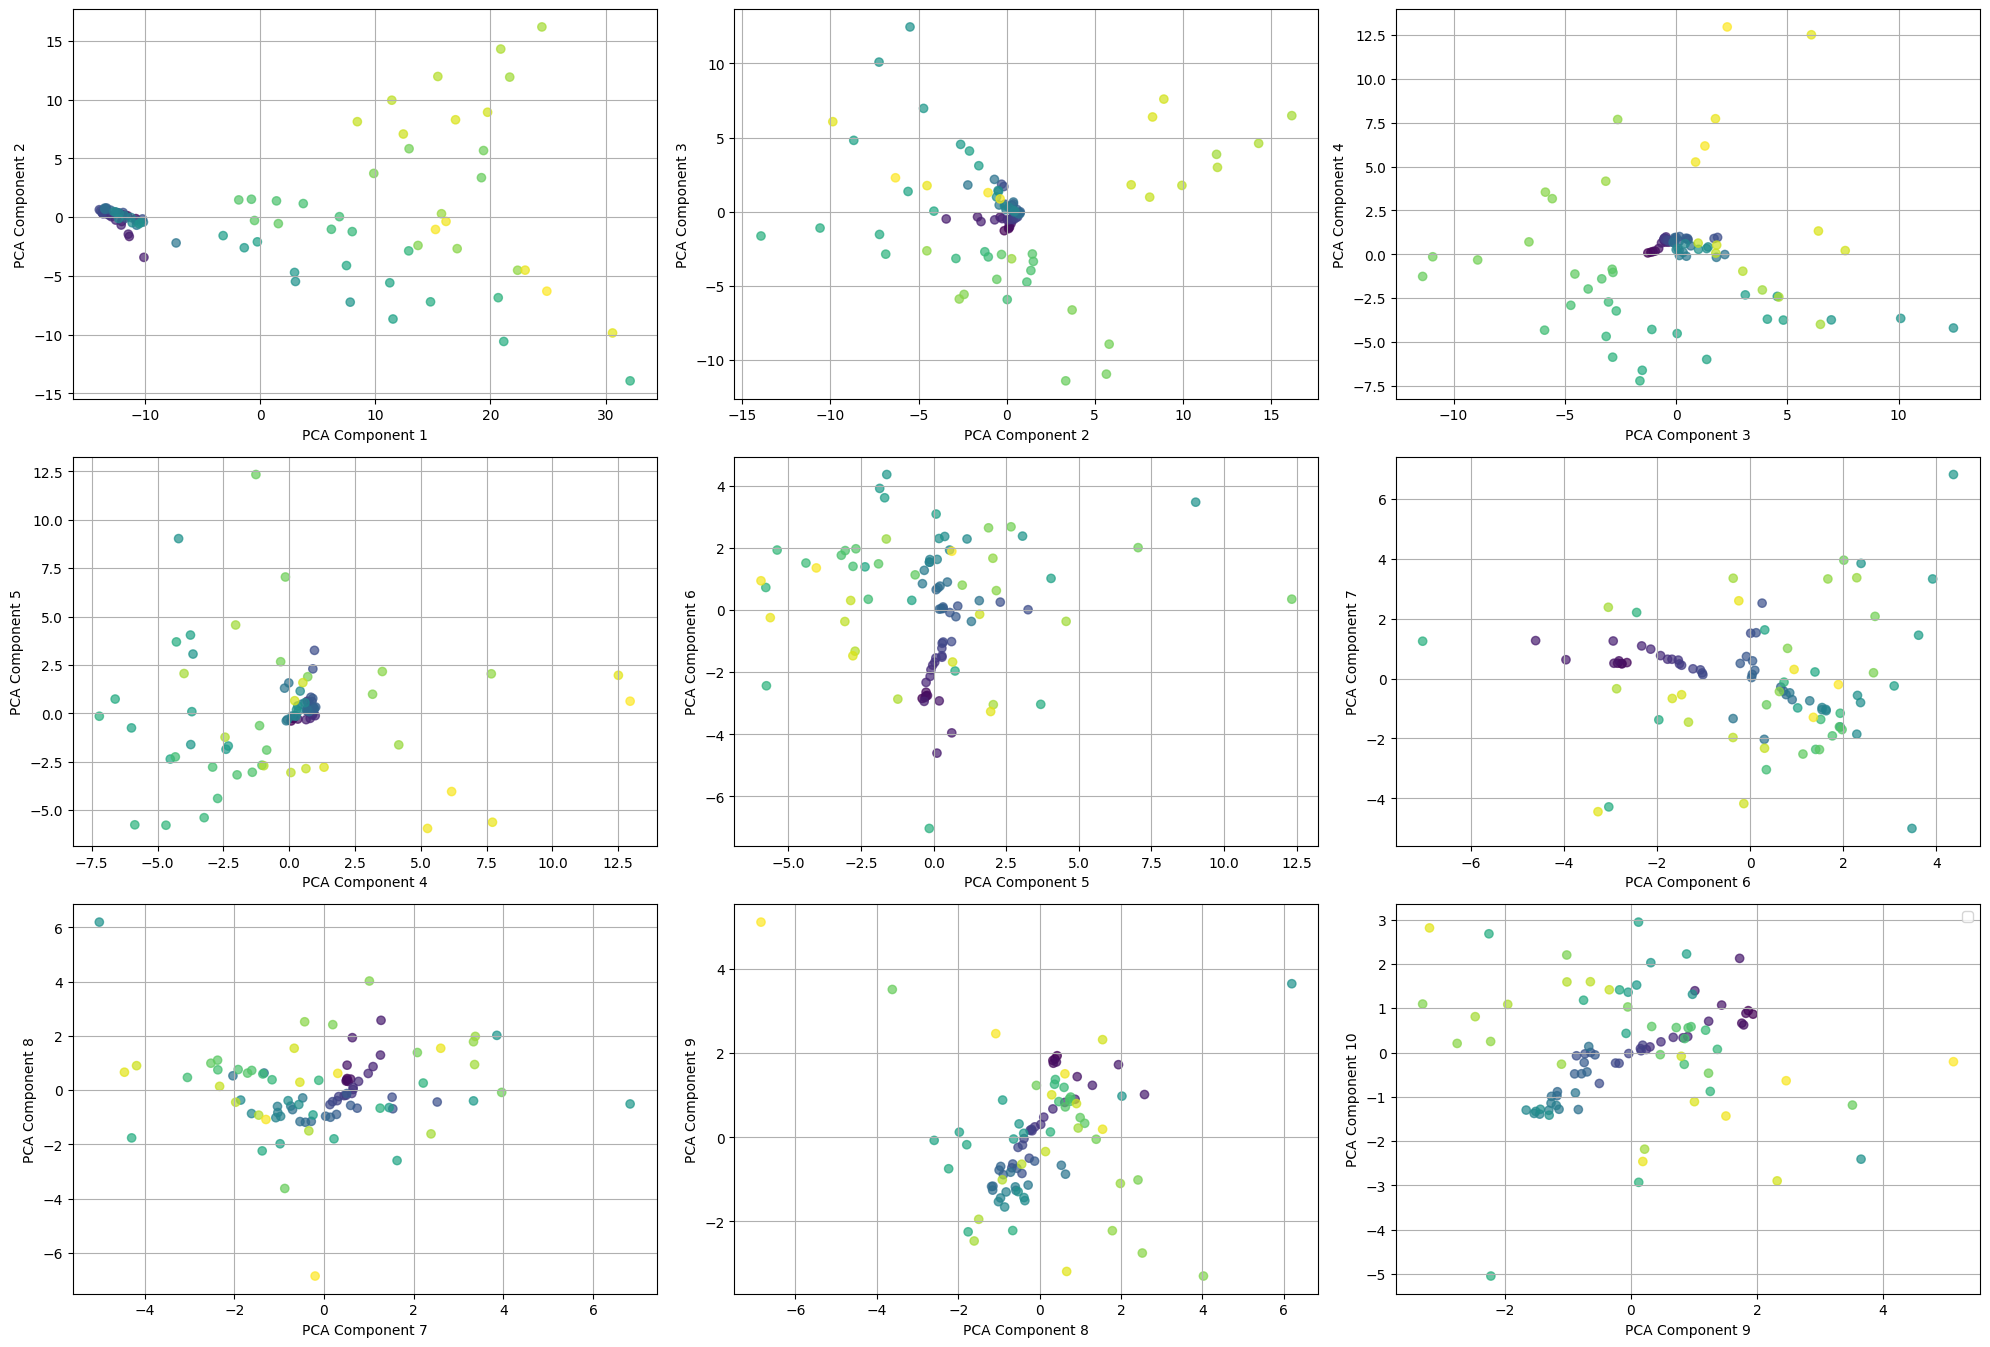

In [323]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [324]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.470
KMeans Davies-Bouldin Index is 1.266


<Axes: xlabel='k'>

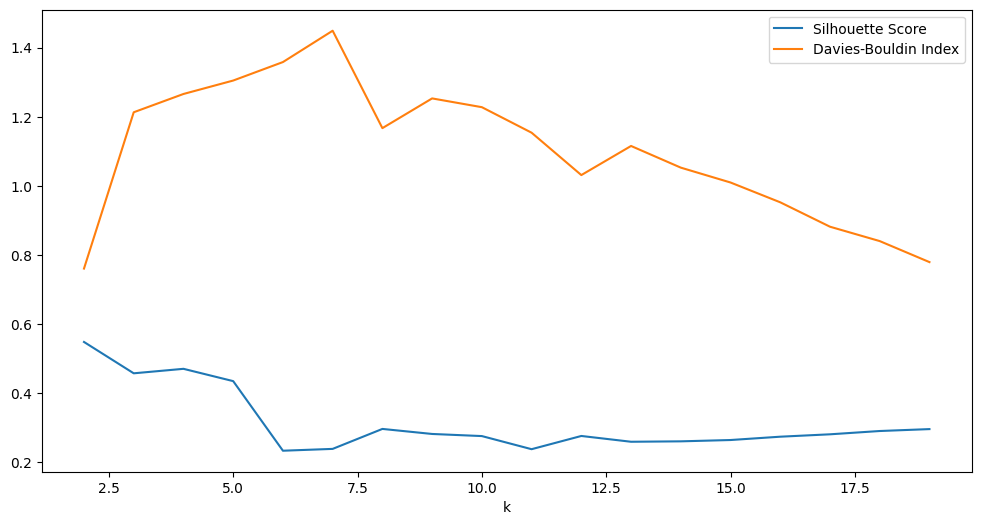

In [325]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         2     79         -0.118129   
1    0.76            3         5     67          0.041164   
2    1.01            3         5     63          0.081446   
3    1.27            3         5     60          0.121117   
4    1.52            3         4     58          0.147732   
5    1.78            3         4     52          0.176785   
6    2.03            3         3     52          0.211122   
7    2.29            3         1     51               NaN   
8    2.54            3         2     48          0.233353   
9    2.80            3         2     48          0.233353   
10   3.05            3         2     45          0.276680   
11   3.31            3         2     44          0.290978   
12   3.56            3         2     44          0.290978   
13   3.82            3         2     42          0.320032   
14   4.07            3         2     42          0.320032   
15   4.33            3         2     42          0.320032   
16   4.58            3         2     38          0.366767   
17   4.84            3         3     33          0.373600   
18   5.09            3         3     33          0.373600   
19   5.35            3         4     30          0.354549   
20   5.60            3         4     30          0.354549   
21   5.86            3         4     30          0.354549   
22   6.11            3         4     29          0.351701   
23   6.37            3         4     29          0.351701   
24   6.62            3         4     29          0.351701   
25   6.88            3         4     28          0.387076   
26   7.13            3         4     25          0.392680   
27   7.39            3         4     24          0.402276   
28   7.64            3         4     24          0.402276   
29   7.90            3         4     23          0.411633   
30   8.15            3         4     23          0.411633   
31   8.41            3         5     19          0.379244   
32   8.66            3         4     18          0.400855   
33   8.92            3         3     18          0.344200   
34   9.17            3         4     13          0.367797   
35   9.43            3         3     11          0.398621   
36   9.68            3         3     10          0.410199   
37   9.94            3         3     10          0.410199   
38  10.19            3         3      6          0.391152   
39  10.45            3         3      5          0.403754   
40  10.70            3         3      5          0.403754   
41  10.96            3         3      5          0.403754   
42  11.21            3         2      5          0.357845   
43  11.47            3         2      5          0.357845   
44  11.72            3         1      4               NaN   
45  11.98            3         1      4               NaN   
46  12.23            3         1      4               NaN   
47  12.49            3         1      4               NaN   
48  12.74            3         1      4               NaN   
49  13.00            3         1      4               NaN   

    Davies-Bouldin Index  
0               1.021044  
1               0.916722  
2               0.878579  
3               0.844499  
4               0.856351  
5               0.803570  
6               0.775405  
7                    NaN  
8               1.160090  
9               1.160090  
10              1.197261  
11              1.211945  
12              1.211945  
13              1.119235  
14              1.119235  
15              1.119235  
16              1.155701  
17              0.988953  
18              0.988953  
19              1.071147  
20              1.071147  
21              1.071147  
22              1.098249  
23              1.098249  
24              1.098249  
25              1.090447  
26              1.170792  
27              1.184063  
28              1.184063  
29              1.177957  
30              1.177957  
31              1.579199  
32 

<Axes: xlabel='eps'>

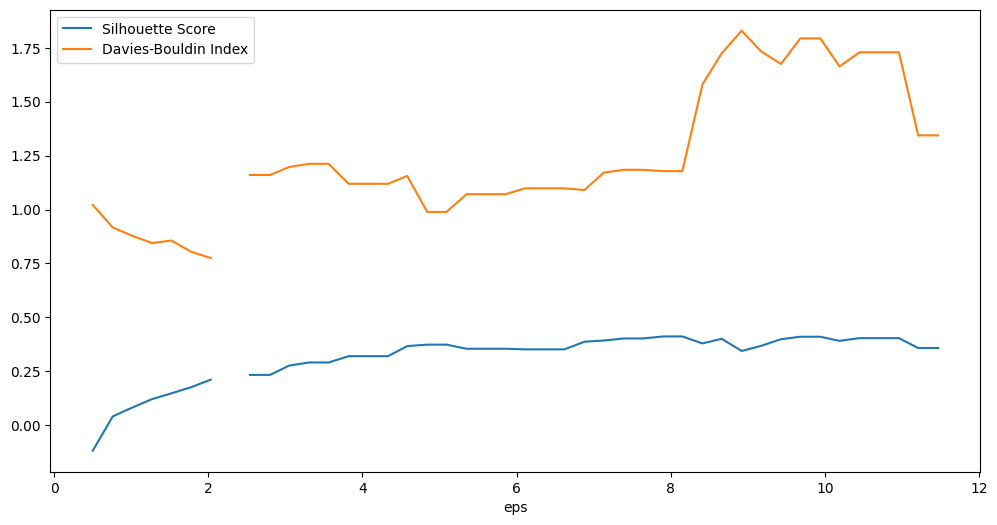

In [326]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

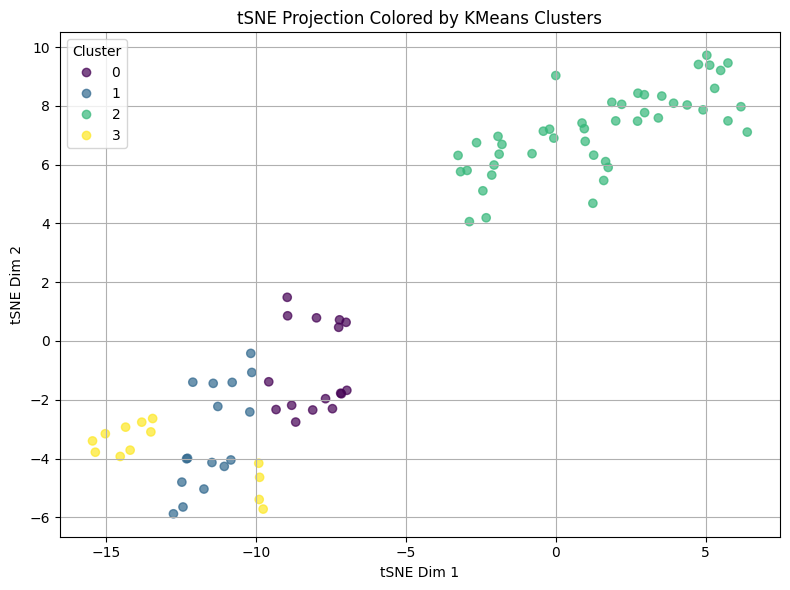

In [327]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        25    202          0.591243              0.428361
1   0.07            2        25    155          0.386186              0.631158
2   0.09            2        17    102         -0.100897              0.737042
3   0.11            2        13     77          0.014402              0.698132
4   0.13            2        14     52         -0.018744              0.775336
5   0.15            2        11     40          0.016683              0.712370
6   0.17            2         5     34         -0.021891              0.789637
7   0.19            2         3     29          0.469193              0.441521
8   0.21            2         4     25          0.332087              0.557435
9   0.22            2         1     25               NaN                   NaN
10  0.24            2         3     18          0.398497              0.501499
11  0.26            2         3     16          0.390997              0.506925
12  0.28            2         3     14          0.385303              0.511555
13  0.30            2         3     12          0.377471              0.517352
14  0.32            2         3      9          0.523405              0.413980
15  0.34            2         3      7          0.470243              0.525903
16  0.36            2         3      7          0.470243              0.525903
17  0.38            2         3      7          0.470243              0.525903
18  0.40            2         2      6          0.777512              0.205491
19  0.42            2         2      6          0.777512              0.205491
20  0.44            2         2      5          0.775596              0.206821
21  0.46            2         2      5          0.775596              0.206821
22  0.48            2         2      5          0.775596              0.206821
23  0.50            2         2      5          0.775596              0.206821
24  0.52            2         2      5          0.775596              0.206821
25  0.53            2         2      5          0.775596              0.206821
26  0.55            2         2      5          0.775596              0.206821
27  0.57            2         2      5          0.775596              0.206821
28  0.59            2         2      5          0.775596              0.206821
29  0.61            2         2      5          0.775596              0.206821
30  0.63            2         2      5          0.775596              0.206821
31  0.65            2         2      4          0.771908              0.209170
32  0.67            2         2      4          0.771908              0.209170
33  0.69            2         2      4          0.771908              0.209170
34  0.71            2         2      4          0.771908              0.209170
35  0.73            2         2      4          0.771908              0.209170
36  0.75            2         2      4          0.771908              0.209170
37  0.77            2         2      4          0.771908              0.209170
38  0.79            2         2      3          0.765463              0.211954
39  0.81            2         2      3          0.765463              0.211954
40  0.83            2         1      3               NaN                   NaN
41  0.84            2         1      3               NaN                   NaN
42  0.86            2         1      3               NaN                   NaN
43  0.88            2         1      3               NaN                   NaN
44  0.90            2         1      3               NaN                   NaN
45  0.92            2         1      3               NaN                   NaN
46  0.94            2         1      3               NaN                   NaN
47  0.96            2         1      3               NaN                   NaN
48  0.98            2         1      2               NaN                   NaN
49  1.00            2         1      2               Na

<Axes: xlabel='eps'>

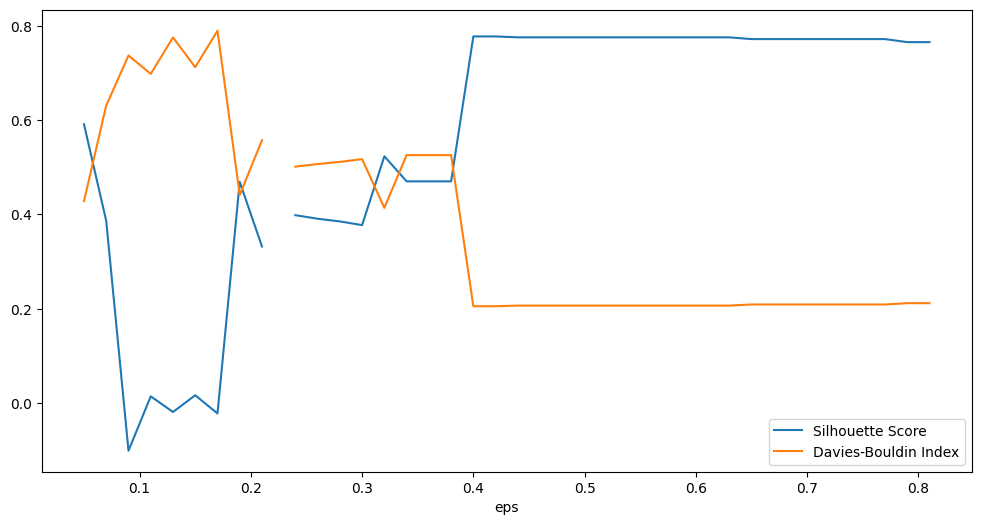

In [328]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [329]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [330]:
season = 4
season_year = 2002
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2002-12-01 to 2003-02-28
Columns: 281 entries, 10000009 to 22000047
dtypes: float64(281)
memory usage: 198.3 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-12-01  1.369429  1.252775  1.595342  1.390402  0.785162  1.316594   
2002-12-02  1.130639  1.055079  1.248210  1.243994  0.691640  1.323587   
2002-12-03  1.011724  0.963952  1.050205  1.134826  0.658230  1.322461   
2002-12-04  0.955988  0.918729  0.952696  1.096927  0.645930  1.300298   
2002-12-05  0.937449  0.884106  0.905205  1.068555  0.637394  1.274726   
...              ...       ...       ...       ...       ...       ...   
2003-02-24  0.753858  0.628895  0.410824  0.905414  0.519944  0.995431   
2003-02-25  0.744677  0.629077  0.406543  0.894674  0.518409  0.965798   
2003-02-26  0.746874  0.630604  0.404818  0.888609  0.524086  0.941984   
2003-02-27  0.747595  0.630268  0.404541  0.889116  0.518115  0.914590   
2003-02-28  0.733379  0.635292  0.404202  0.878448  0.517968  0.889308   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-12-01  1.728157  0.967948  

          2002-12-01  2002-12-02  2002-12-03  2002-12-04  2002-12-05  \
10000009   -0.073954   -0.084027   -0.081510   -0.079737   -0.075209   
10000010   -0.082137   -0.090355   -0.085565   -0.082912   -0.079718   
10000011   -0.058108   -0.074180   -0.078243   -0.080018   -0.077935   
10000014   -0.072483   -0.074533   -0.071059   -0.067727   -0.064127   
10000016   -0.114936   -0.120793   -0.111518   -0.106159   -0.100573   
...              ...         ...         ...         ...         ...   
7000003     0.019366    0.011968   -0.013091   -0.032338   -0.039667   
8000001     0.074108    0.073387    0.040765    0.012723    0.005296   
9000001    -0.035461   -0.028747   -0.023041   -0.016778   -0.019574   
9000015    -0.041193   -0.034676   -0.028393   -0.022110   -0.024144   
22000047   -0.125289   -0.126533   -0.115182   -0.109062   -0.103545   

          2002-12-06  2002-12-07  2002-12-08  2002-12-09  2002-12-10  ...  \
10000009   -0.070580   -0.068554   -0.067754   -0.067592  

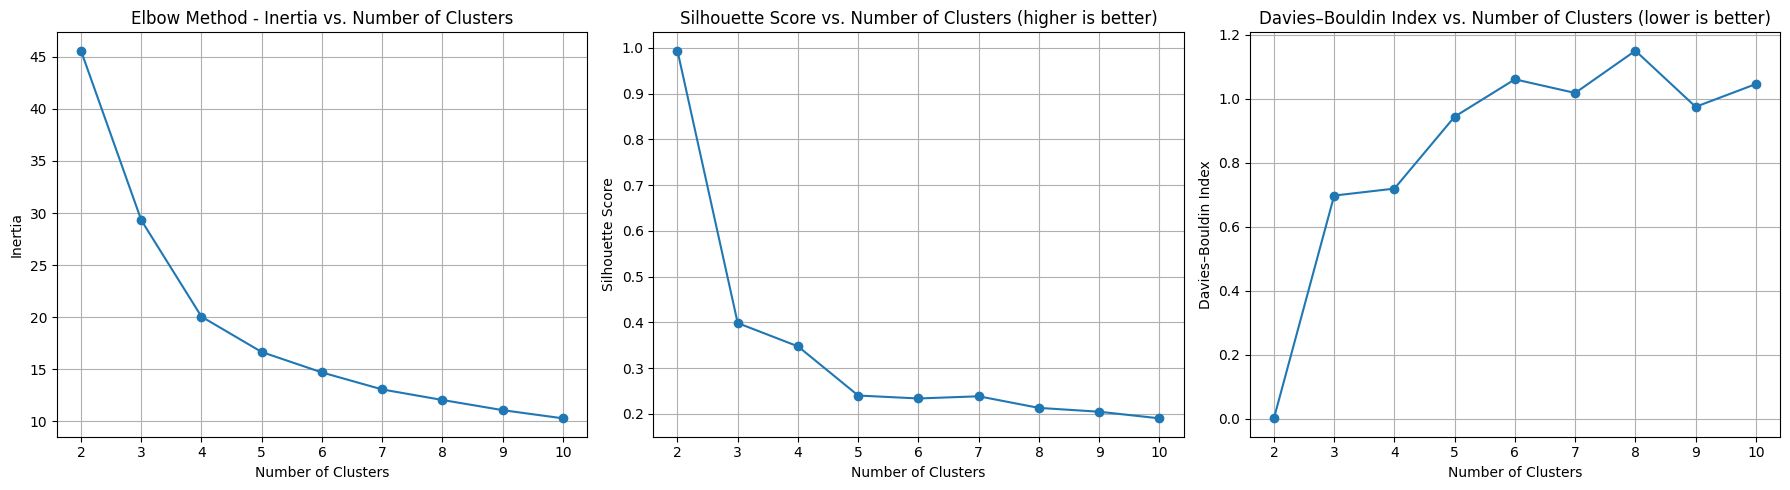

In [331]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2002-12-01  1.369429  1.252775  1.595342  1.390402  0.785162  1.316594   
2002-12-02  1.130639  1.055079  1.248210  1.243994  0.691640  1.323587   
2002-12-03  1.011724  0.963952  1.050205  1.134826  0.658230  1.322461   
2002-12-04  0.955988  0.918729  0.952696  1.096927  0.645930  1.300298   
2002-12-05  0.937449  0.884106  0.905205  1.068555  0.637394  1.274726   
...              ...       ...       ...       ...       ...       ...   
2003-02-24  0.753858  0.628895  0.410824  0.905414  0.519944  0.995431   
2003-02-25  0.744677  0.629077  0.406543  0.894674  0.518409  0.965798   
2003-02-26  0.746874  0.630604  0.404818  0.888609  0.524086  0.941984   
2003-02-27  0.747595  0.630268  0.404541  0.889116  0.518115  0.914590   
2003-02-28  0.733379  0.635292  0.404202  0.878448  0.517968  0.889308   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-12-01  1.728157  0.967948  

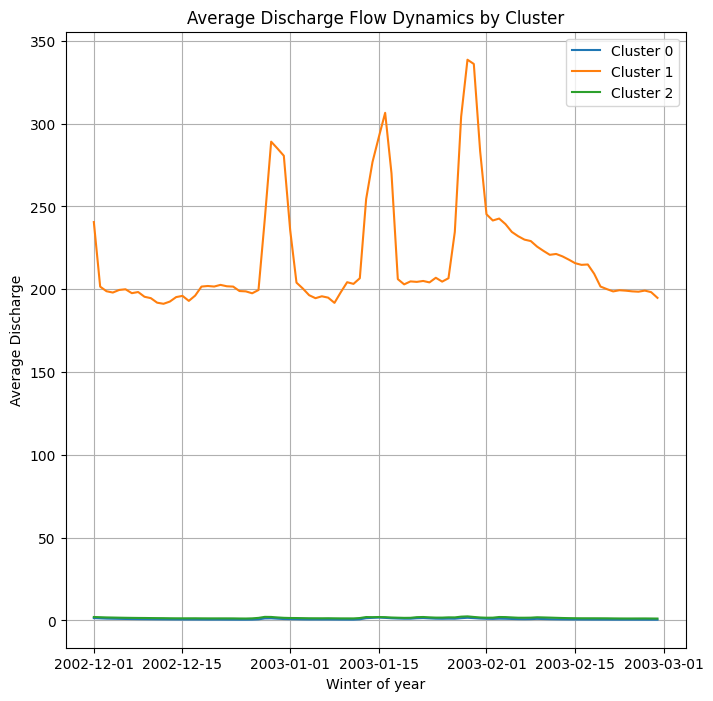

In [332]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [333]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [334]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2002-12-01  1.369429  1.252775  1.595342  1.390402  0.785162  1.316594   
2002-12-02  1.130639  1.055079  1.248210  1.243994  0.691640  1.323587   
2002-12-03  1.011724  0.963952  1.050205  1.134826  0.658230  1.322461   
2002-12-04  0.955988  0.918729  0.952696  1.096927  0.645930  1.300298   
2002-12-05  0.937449  0.884106  0.905205  1.068555  0.637394  1.274726   
...              ...       ...       ...       ...       ...       ...   
2003-02-24  0.753858  0.628895  0.410824  0.905414  0.519944  0.995431   
2003-02-25  0.744677  0.629077  0.406543  0.894674  0.518409  0.965798   
2003-02-26  0.746874  0.630604  0.404818  0.888609  0.524086  0.941984   
2003-02-27  0.747595  0.630268  0.404541  0.889116  0.518115  0.914590   
2003-02-28  0.733379  0.635292  0.404202  0.878448  0.517968  0.889308   

            11000016  13000011  13000019  14000016  ...  64000033  66000014  \
2002-12-01  1.728157  0.967948  1.484741  1.623291  ...  0.815479  0.722831   
2002-12-02  1.448386  0.878620  1.254173  1.408095  ...  0.848247  0.724429   
2002-12-03  1.230135  0.815743  1.149875  1.282384  ...  0.873595  0.646789   
2002-12-04  1.130174  0.793071  1.107639  1.228541  ...  0.895976  0.625883   
2002-12-05  1.050488  0.767980  1.076712  1.212541  ...  0.915266  0.650765   
...              ...       ...       ...       ...  ...       ...       ...   
2003-02-24  0.776969  0.482614  0.817700  0.965807  ...  0.725337  0.371687   
2003-02-25  0.771189  0.480573  0.814133  0.960175  ...  0.707408  0.373436   
2003-02-26  0.781545  0.483143  0.818576  0.960893  ...  0.698876  0.392525   
2003-02-27  0.775215  0.483672  0.819416  0.960549  ...  0.687747  0.407760   
2003-02-28  0.761689  0.477248  0.804725  0.957397  ...  0.669818  0.351333   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2002-12-01  1.058606  0.932374  1.603332  2.699859  3.480297  1.918216   
2002-12-02  1.104741  0.946768  1.551366  2.276842  3.010204  1.790696   
2002-12-03  0.970614  0.870699  1.431718  1.817678  2.452084  1.700477   
2002-12-04  0.927650  0.887758  1.509397  1.512214  2.041006  1.694814   
2002-12-05  1.151949  1.010214  1.603345  1.357919  1.889835  1.595622   
...              ...       ...       ...       ...       ...       ...   
2003-02-24  0.365212  0.383288  0.545941  0.424098  0.566036  1.315794   
2003-02-25  0.384313  0.527012  0.491212  0.418677  0.559289  1.315357   
2003-02-26  0.366206  0.385422  0.471749  0.413256  0.552390  1.323040   
2003-02-27  0.339668  0.400342  0.466320  0.407835  0.543941  1.321394   
2003-02-28  0.304148  0.341102  0.468250  0.403472  0.533334  1.308519   

             9000015  22000047  
2002-12-01  1.836491  0.637561  
2002-12-02  1.719906  0.623107  
2002-12-03  1.637422  0.615078  
2002-12-04  1.632245  0.611866  
2002-12-05  1.541559  0.602230  
...              ...       ...  
2003-02-24  1.285724  0.629531  
2003-02-25  1.285325  0.632743  
2003-02-26  1.292350  0.640773  
2003-02-27  1.290845  0.643985  
2003-02-28  1.279073  0.647197  

[90 rows x 281 columns]

<Axes: >

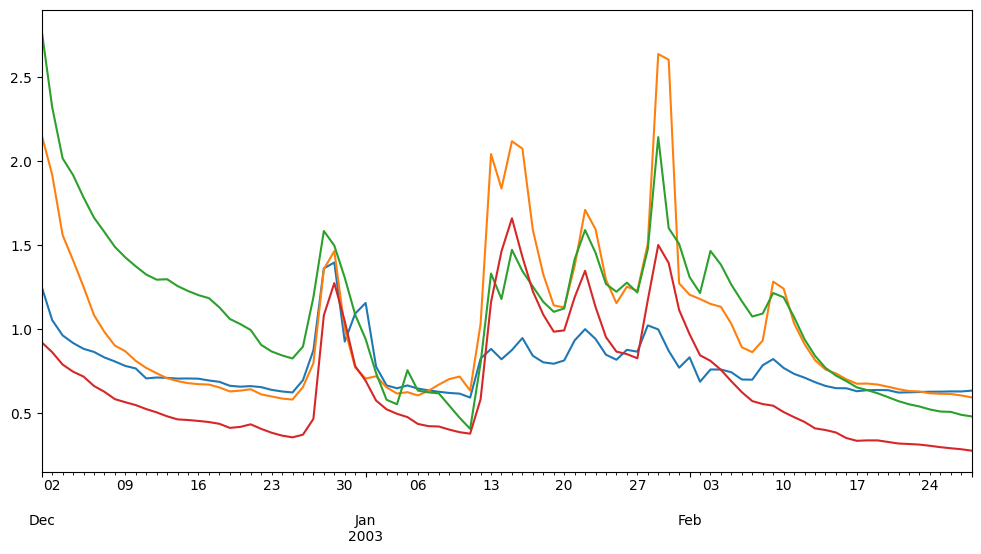

In [335]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

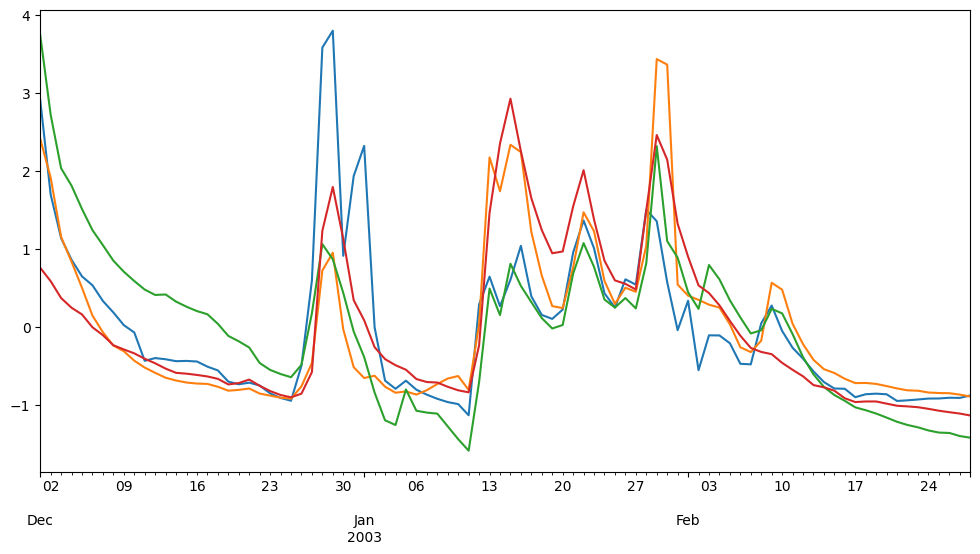

In [336]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

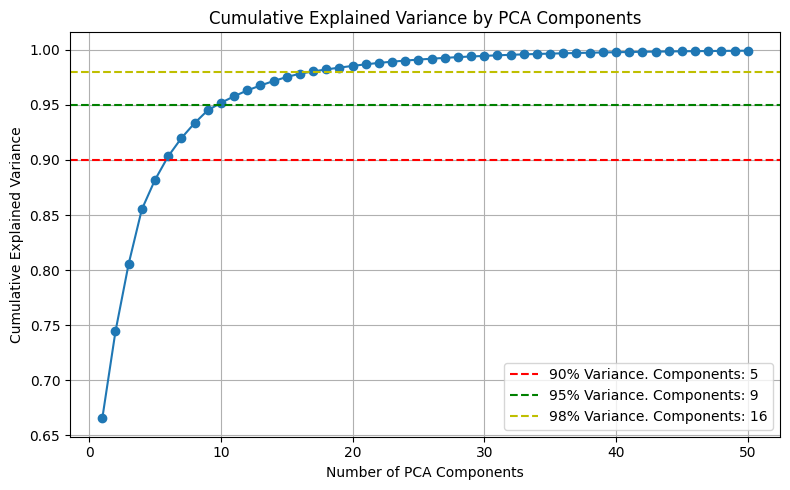

In [337]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [338]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 24.63050855,  -1.30470175,   4.7698286 , ...,  -1.1135376 ,
         -0.08986803,  -0.55299618],
       [ 18.05598639,  -1.74944752,   6.58334524, ...,   1.10345859,
         -0.32776986,  -0.14928836],
       [ 12.01248679,  -1.1993751 ,   6.47029853, ...,   1.3712955 ,
         -0.27642279,   0.1095652 ],
       ...,
       [-15.55681456,   0.80965854,  -1.25102106, ...,  -0.21428994,
         -0.53649254,   0.51387514],
       [-15.97381402,   0.61540382,  -1.33865282, ...,  -0.14436024,
         -0.41094263,   0.57020637],
       [-16.52396938,   0.37390301,  -1.46766449, ...,  -0.02868223,
         -0.41116006,   0.577706  ]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


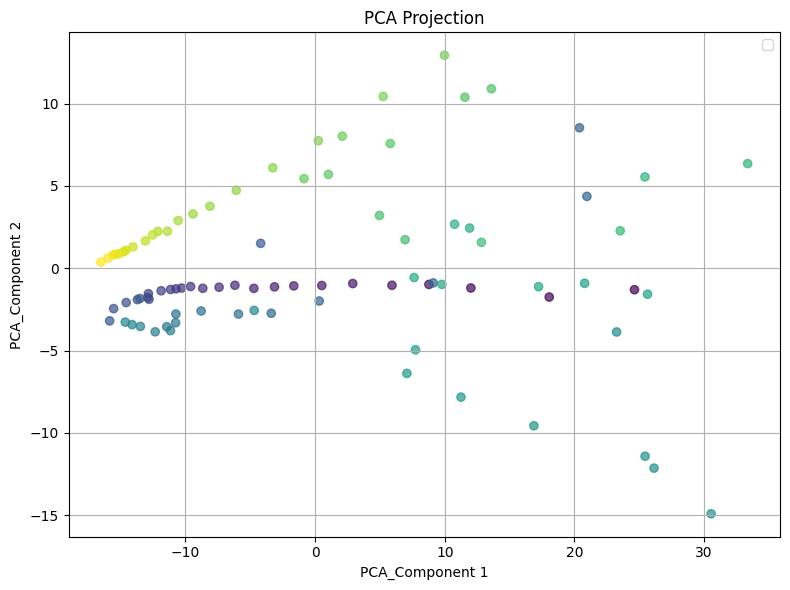

In [339]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_31812\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


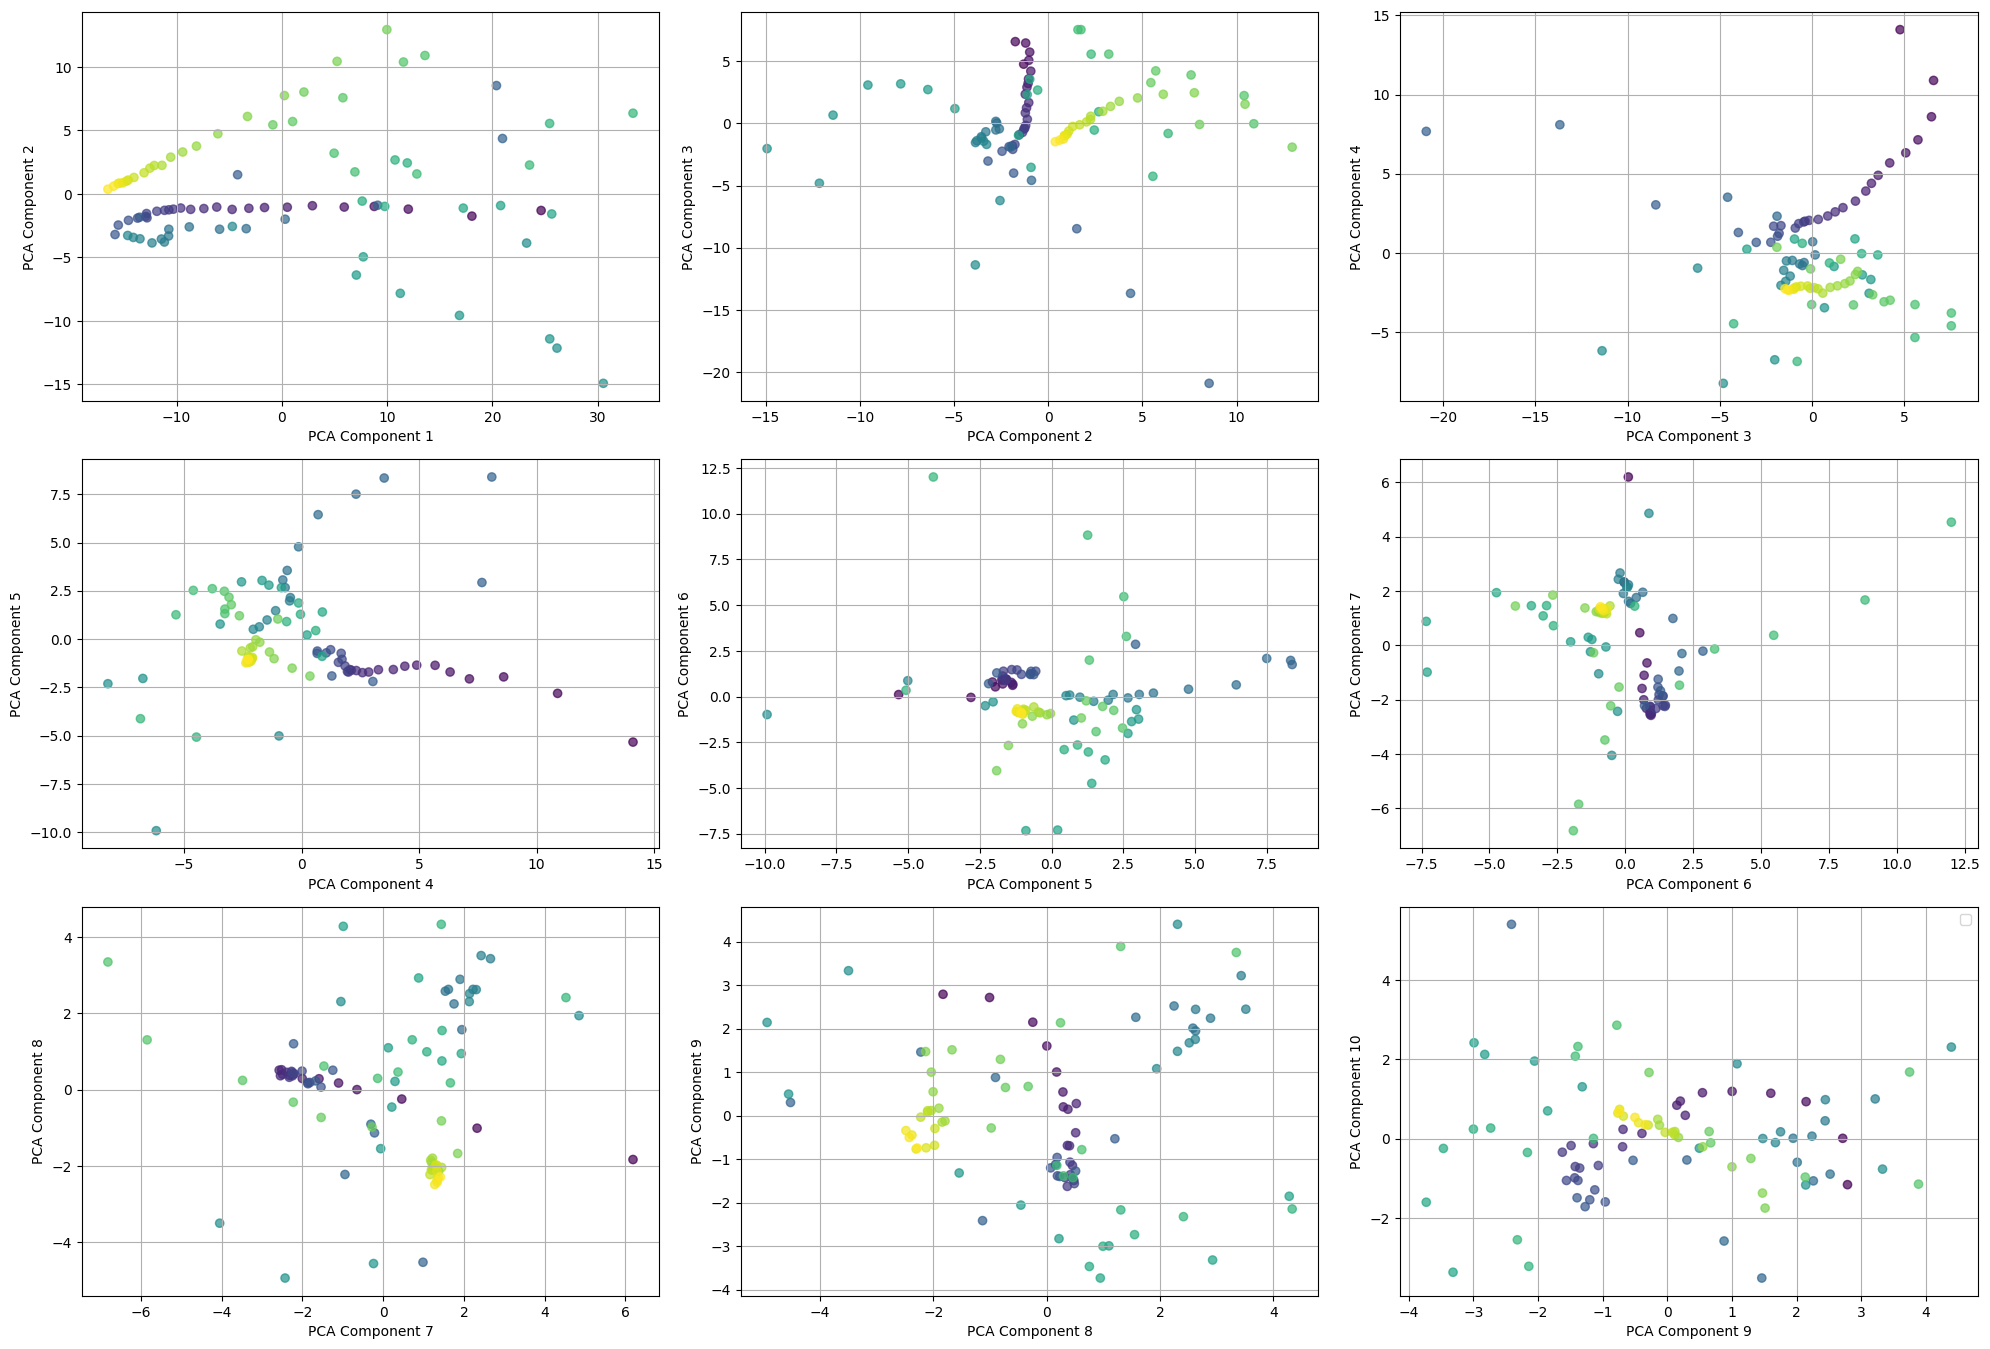

In [340]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [341]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.253
KMeans Davies-Bouldin Index is 1.449


<Axes: xlabel='k'>

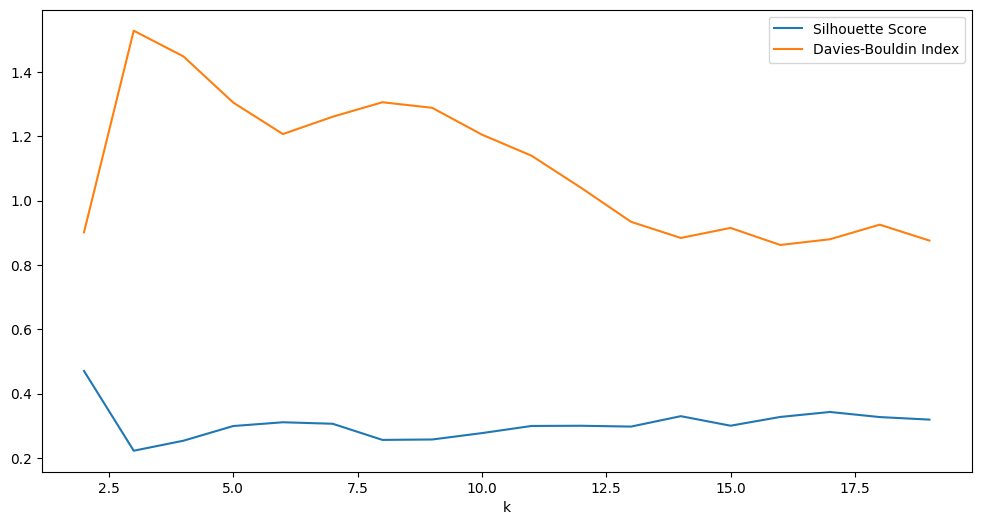

In [342]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         1     87               NaN   
2    1.01            3         2     80         -0.087450   
3    1.27            3         3     71         -0.010921   
4    1.52            3         3     64          0.115110   
5    1.78            3         3     58          0.158881   
6    2.03            3         3     56          0.172454   
7    2.29            3         3     54          0.162854   
8    2.54            3         4     48          0.198951   
9    2.80            3         4     47          0.186747   
10   3.05            3         4     45          0.209098   
11   3.31            3         3     44          0.258340   
12   3.56            3         3     42          0.222236   
13   3.82            3         3     41          0.222987   
14   4.07            3         3     39          0.213693   
15   4.33            3         3     38          0.209419   
16   4.58            3         3     38          0.209419   
17   4.84            3         4     35          0.098038   
18   5.09            3         4     34          0.110305   
19   5.35            3         4     34          0.110305   
20   5.60            3         4     32          0.107569   
21   5.86            3         5     27          0.089047   
22   6.11            3         5     27          0.089047   
23   6.37            3         5     26          0.092819   
24   6.62            3         5     26          0.092819   
25   6.88            3         6     23          0.115063   
26   7.13            3         5     21          0.030154   
27   7.39            3         2     20          0.235969   
28   7.64            3         2     20          0.235969   
29   7.90            3         2     17          0.227387   
30   8.15            3         2     16          0.244676   
31   8.41            3         2     15          0.241332   
32   8.66            3         2     15          0.241332   
33   8.92            3         2     15          0.241332   
34   9.17            3         2     15          0.241332   
35   9.43            3         3     12          0.255265   
36   9.68            3         3     12          0.255265   
37   9.94            3         3     12          0.255265   
38  10.19            3         2     11          0.355455   
39  10.45            3         2     10          0.368447   
40  10.70            3         2     10          0.368447   
41  10.96            3         1      8               NaN   
42  11.21            3         1      8               NaN   
43  11.47            3         1      8               NaN   
44  11.72            3         1      7               NaN   
45  11.98            3         1      7               NaN   
46  12.23            3         1      6               NaN   
47  12.49            3         1      6               NaN   
48  12.74            3         1      5               NaN   
49  13.00            3         1      5               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.002493  
3               1.003475  
4               0.916024  
5               0.900592  
6               0.887698  
7               0.934027  
8               0.895994  
9               0.936407  
10              0.955731  
11              1.011424  
12              1.095083  
13              1.132924  
14              1.193900  
15              1.245037  
16              1.245037  
17              1.460810  
18              1.470541  
19              1.470541  
20              1.531305  
21              1.834751  
22              1.834751  
23              1.862527  
24              1.862527  
25              1.736020  
26              1.696685  
27              1.809852  
28              1.809852  
29              1.654530  
30              1.710535  
31              1.654563  
32 

<Axes: xlabel='eps'>

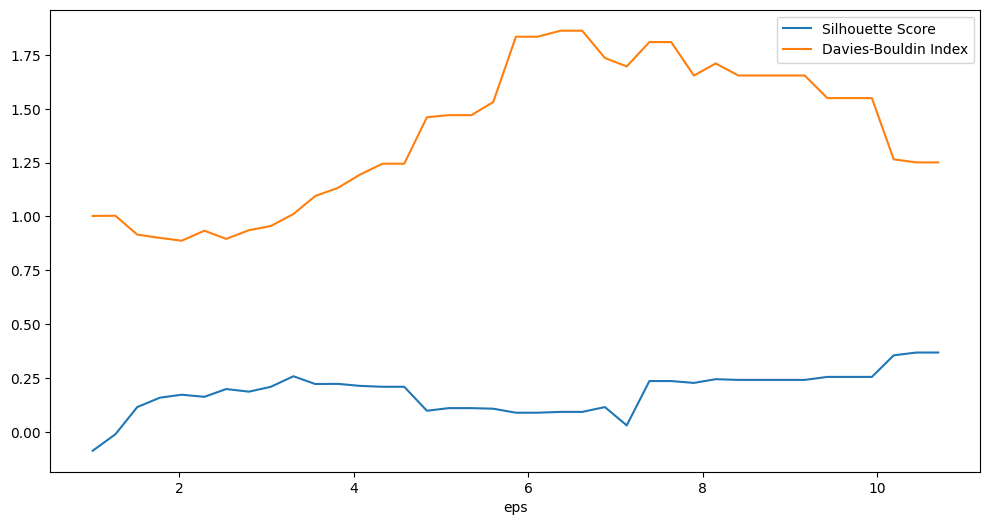

In [343]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

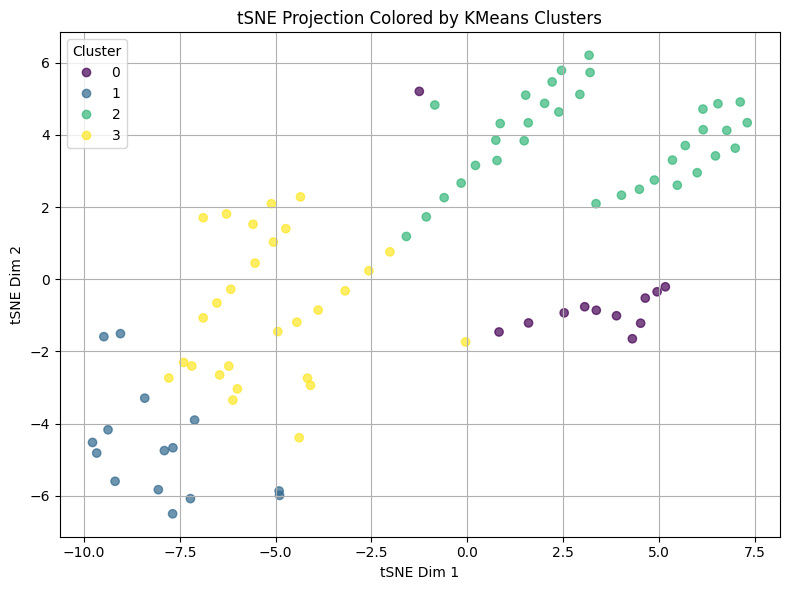

In [344]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        37    148          0.408861              0.679233
1   0.07            2        26     94          0.035209              0.796134
2   0.09            2        11     58         -0.222380              0.954501
3   0.11            2         4     35          0.037485              0.715634
4   0.13            2         1     25               NaN                   NaN
5   0.15            2         1     20               NaN                   NaN
6   0.17            2         1     15               NaN                   NaN
7   0.19            2         1     12               NaN                   NaN
8   0.21            2         1      9               NaN                   NaN
9   0.22            2         1      8               NaN                   NaN
10  0.24            2         1      8               NaN                   NaN
11  0.26            2         1      6               NaN                   NaN
12  0.28            2         1      6               NaN                   NaN
13  0.30            2         2      4          0.833942              0.176570
14  0.32            2         2      4          0.833942              0.176570
15  0.34            2         2      4          0.833942              0.176570
16  0.36            2         2      4          0.833942              0.176570
17  0.38            2         2      4          0.833942              0.176570
18  0.40            2         2      4          0.833942              0.176570
19  0.42            2         2      4          0.833942              0.176570
20  0.44            2         2      4          0.833942              0.176570
21  0.46            2         2      4          0.833942              0.176570
22  0.48            2         2      4          0.833942              0.176570
23  0.50            2         2      4          0.833942              0.176570
24  0.52            2         2      4          0.833942              0.176570
25  0.53            2         2      4          0.833942              0.176570
26  0.55            2         2      4          0.833942              0.176570
27  0.57            2         2      4          0.833942              0.176570
28  0.59            2         2      3          0.829082              0.178715
29  0.61            2         2      3          0.829082              0.178715
30  0.63            2         2      3          0.829082              0.178715
31  0.65            2         2      2          0.823229              0.181157
32  0.67            2         2      2          0.823229              0.181157
33  0.69            2         2      2          0.823229              0.181157
34  0.71            2         2      2          0.823229              0.181157
35  0.73            2         2      2          0.823229              0.181157
36  0.75            2         2      2          0.823229              0.181157
37  0.77            2         2      2          0.823229              0.181157
38  0.79            2         2      2          0.823229              0.181157
39  0.81            2         2      2          0.823229              0.181157
40  0.83            2         2      2          0.823229              0.181157
41  0.84            2         2      2          0.823229              0.181157
42  0.86            2         2      2          0.823229              0.181157
43  0.88            2         2      2          0.823229              0.181157
44  0.90            2         1      2               NaN                   NaN
45  0.92            2         1      2               NaN                   NaN
46  0.94            2         1      2               NaN                   NaN
47  0.96            2         1      2               NaN                   NaN
48  0.98            2         1      2               NaN                   NaN
49  1.00            2         1      2               Na

<Axes: xlabel='eps'>

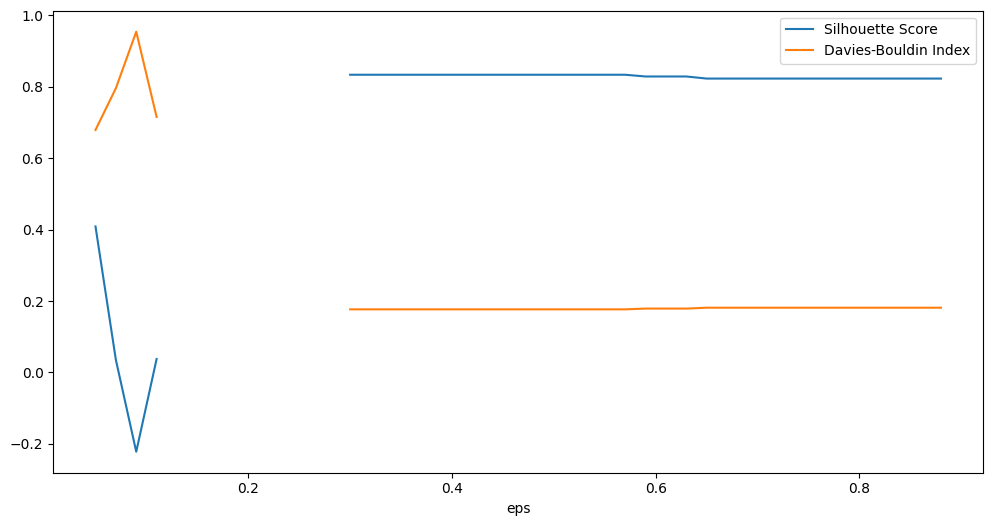

In [345]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))